In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt
import sklearn
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from arch import arch_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Load data
df = pd.read_excel('data/Monthly Mastersheet with Original Data.xlsx')
print(df.head())
print(df.columns.tolist())

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='MS')
df.columns = df.columns.str.strip()

       Month  Bitcoin  Litecoin       XRP  Ethereum  Dogecoin  Cardano  \
0 2017-09-01 -1.39892  -1.02849 -0.898590  -1.32094  -1.40502      NaN   
1 2017-10-01 -1.33954  -0.77151 -1.145490  -0.83798  -0.46490      NaN   
2 2017-11-01 -1.62299  -1.44830 -1.192080  -1.83787  -1.37105      NaN   
3 2017-12-01 -1.26767  -1.11575 -1.254630  -1.31040  -0.70209      NaN   
4 2018-01-01 -0.89251  -0.24164  0.038975  -0.81128  -0.33444      NaN   

    Tether  USD Coin  LFPR  ...     r      M1        IM        EX     CC  \
0 -3.82830       NaN  63.1  ...  1.15  3535.6  2916.022  2535.501   95.1   
1 -3.73861       NaN  62.7  ...  1.15  3615.0  3034.004  2479.107  100.7   
2 -4.01951       NaN  62.7  ...  1.16  3587.6  3034.004  2479.107   98.5   
3 -2.55687       NaN  62.7  ...  1.30  3630.5  3034.004  2479.107   95.9   
4 -2.75193       NaN  62.7  ...  1.41  3673.4  3093.299  2517.268   95.7   

        GDP  PC1_crypto  PC2_crypto    PC1_macro    PC2_macro  
0  19743.84         NaN         Na

In [3]:
## Testing all combinations

macro_list = ['PC1_macro', 'PC2_macro']
asset_list= ['Tether', 'USD Coin','PC1_crypto','PC2_crypto']

# Model with Optimized Lag, and p, q all of (1,1)

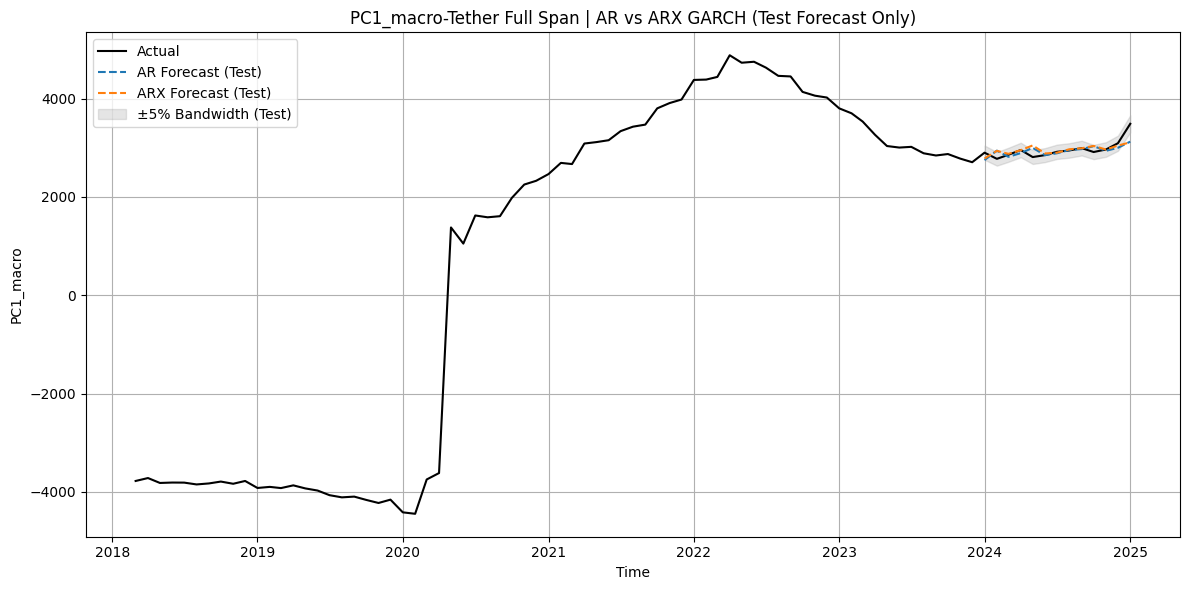


✅ Best lag for PC1_macro-Tether is 5 with MAPE improvement -8.11%


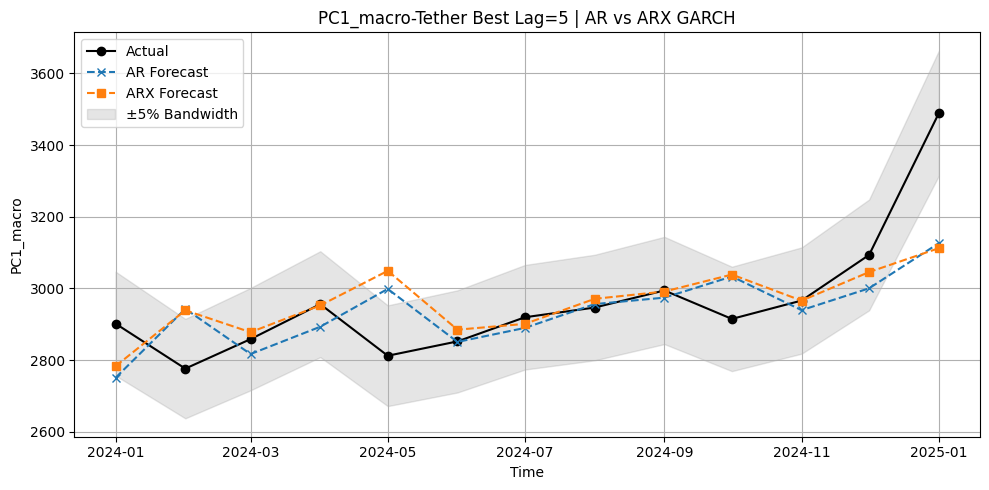

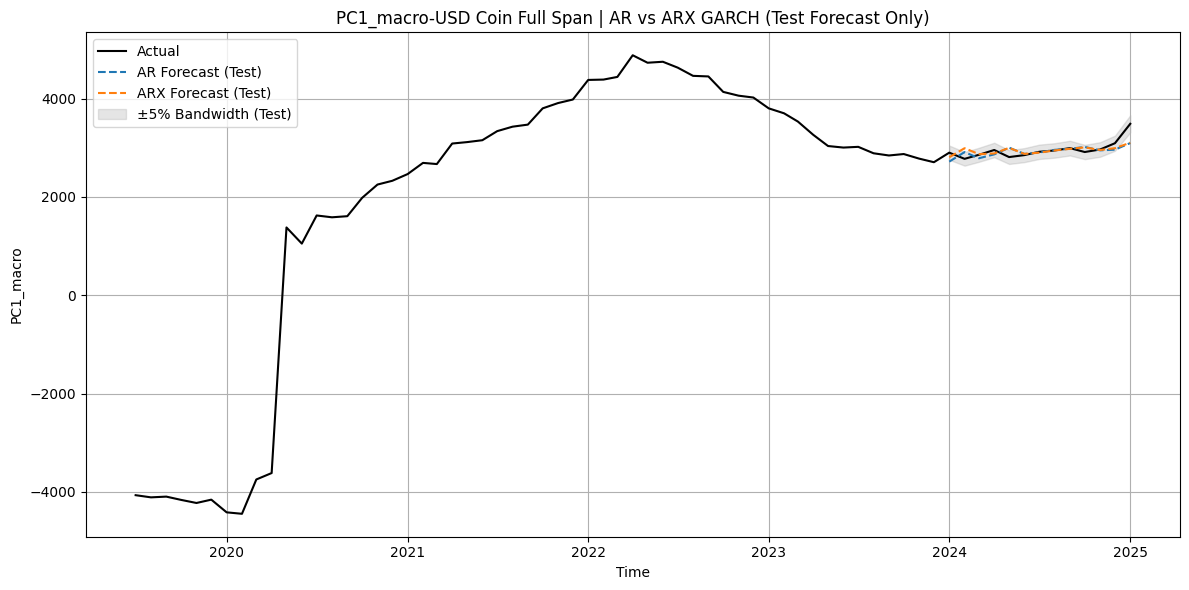


✅ Best lag for PC1_macro-USD Coin is 4 with MAPE improvement -10.80%


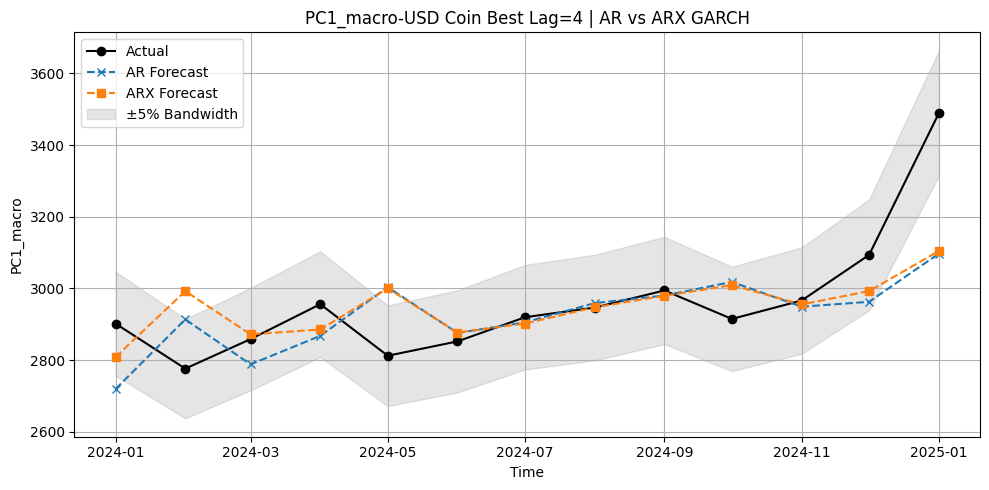

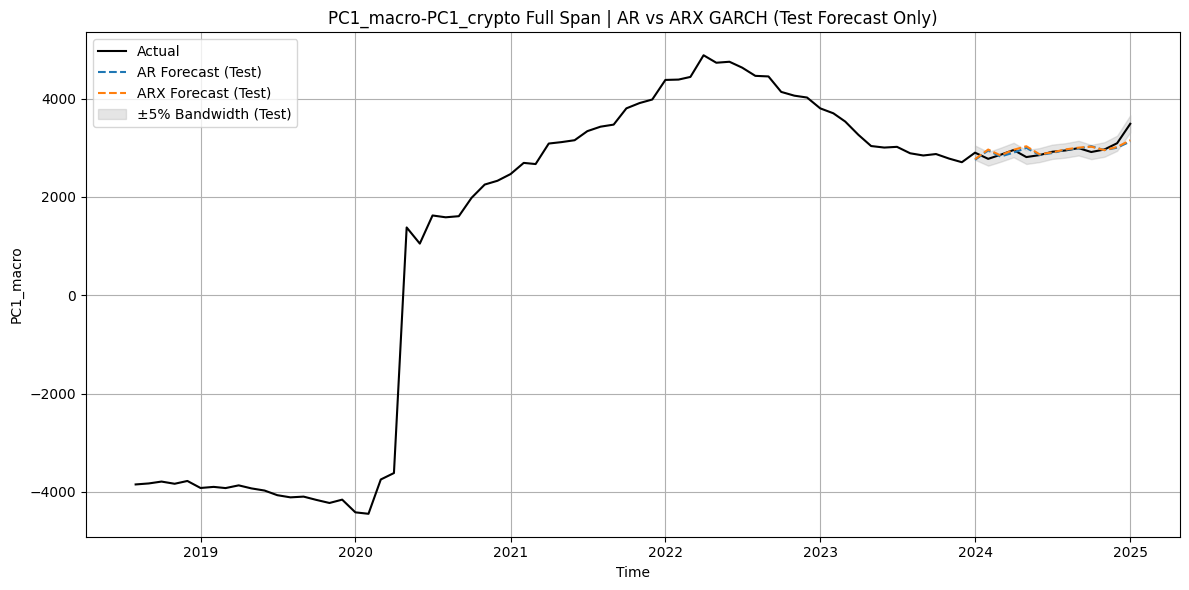


✅ Best lag for PC1_macro-PC1_crypto is 6 with MAPE improvement -5.70%


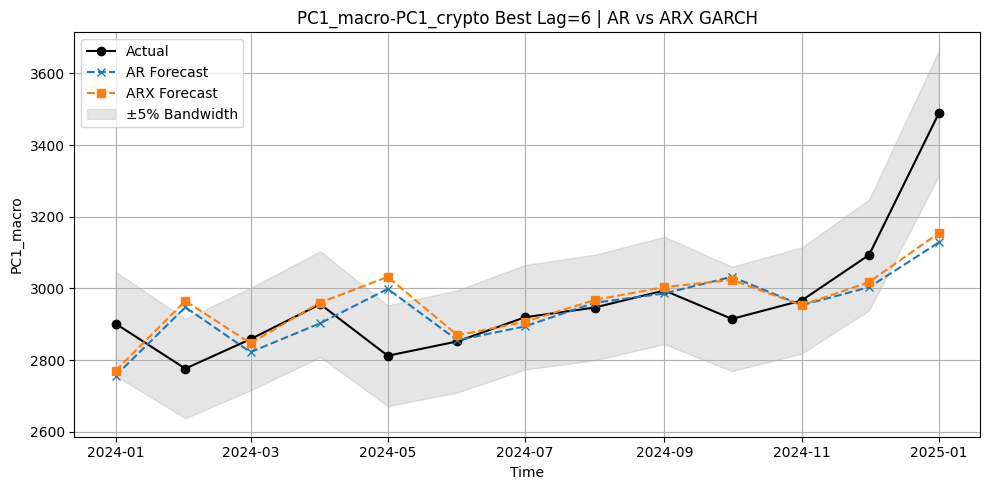

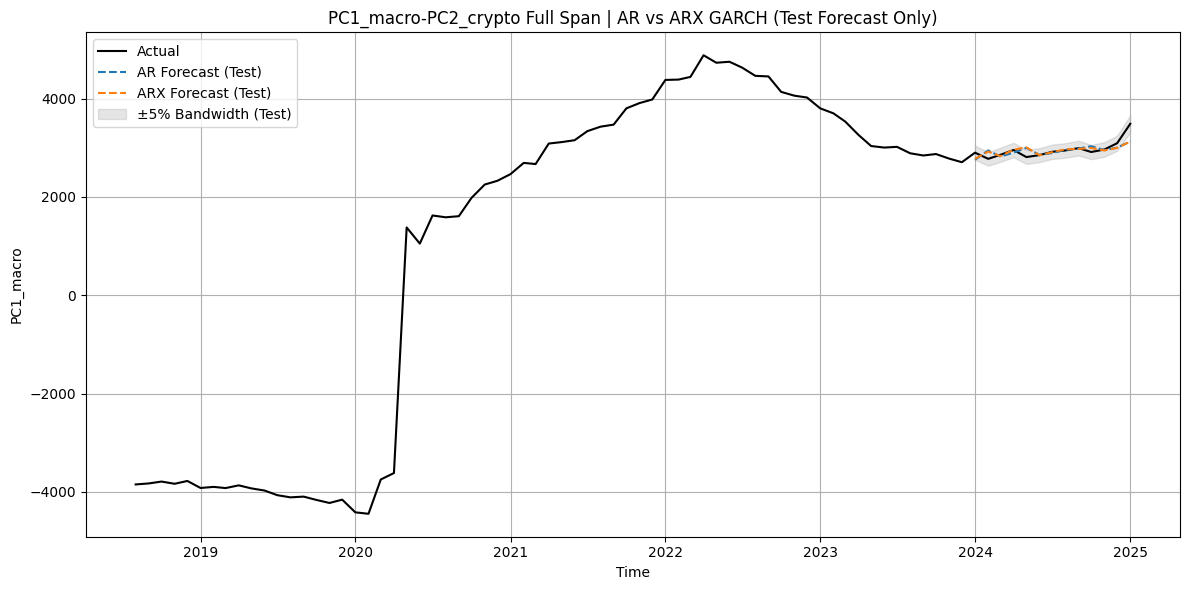


✅ Best lag for PC1_macro-PC2_crypto is 6 with MAPE improvement -9.34%


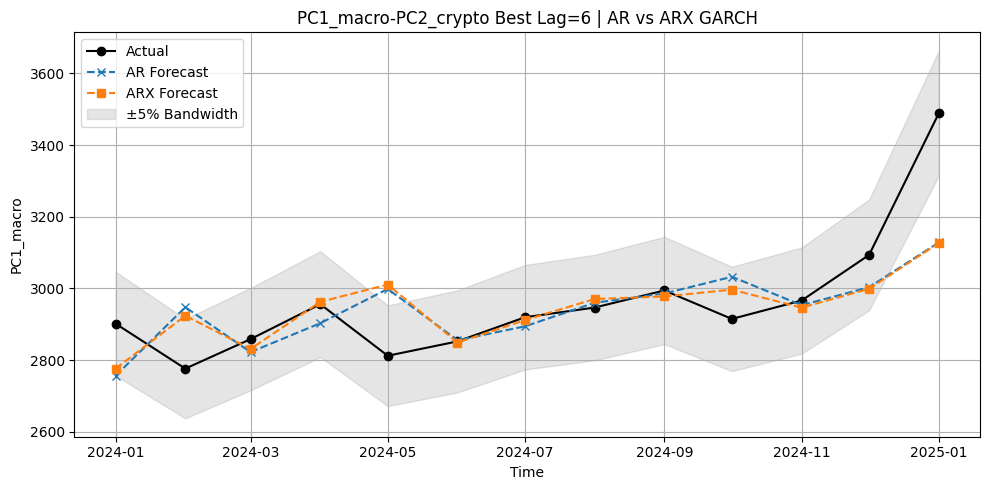

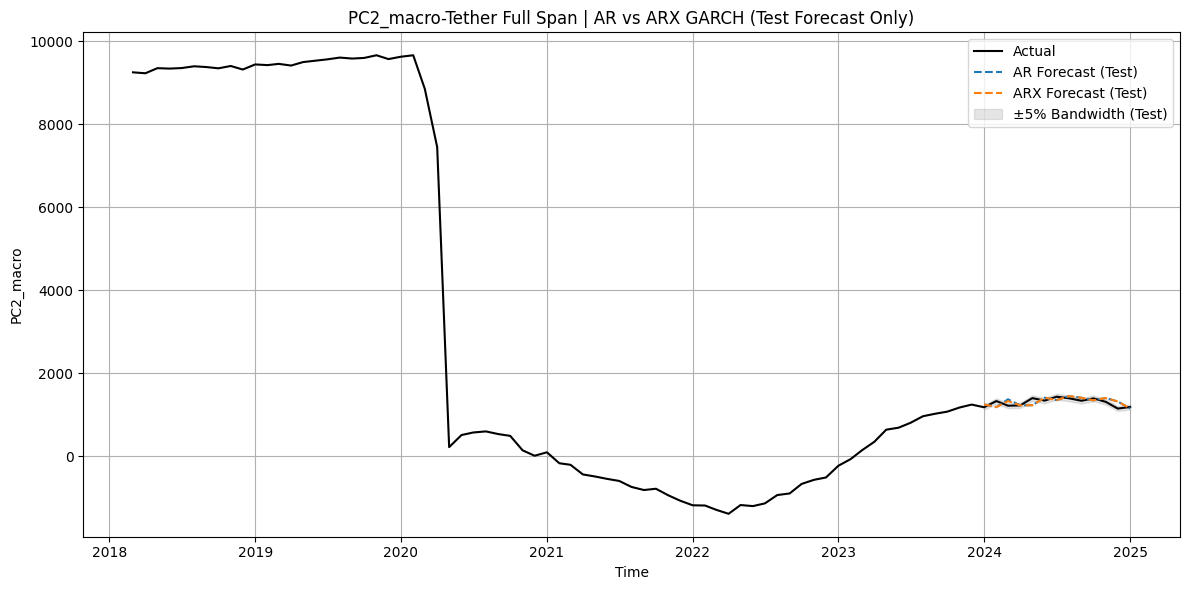


✅ Best lag for PC2_macro-Tether is 1 with MAPE improvement -3.87%


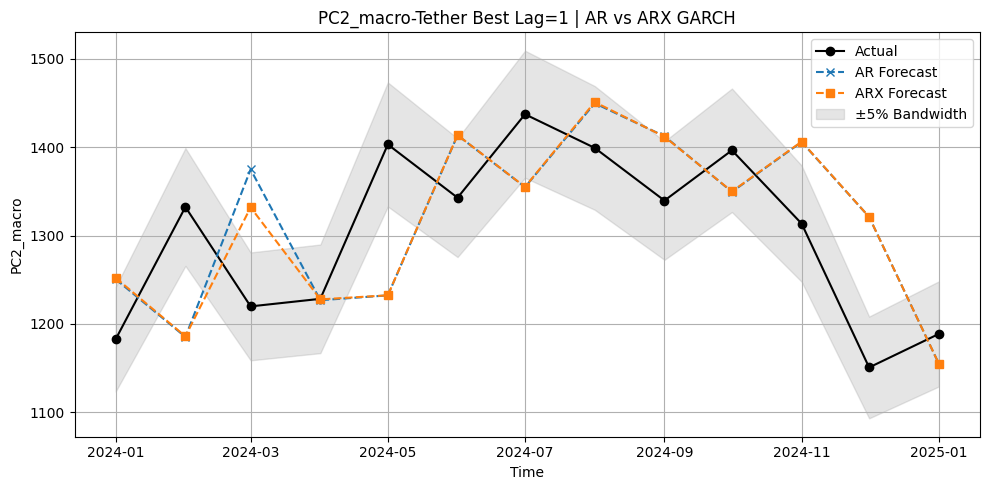

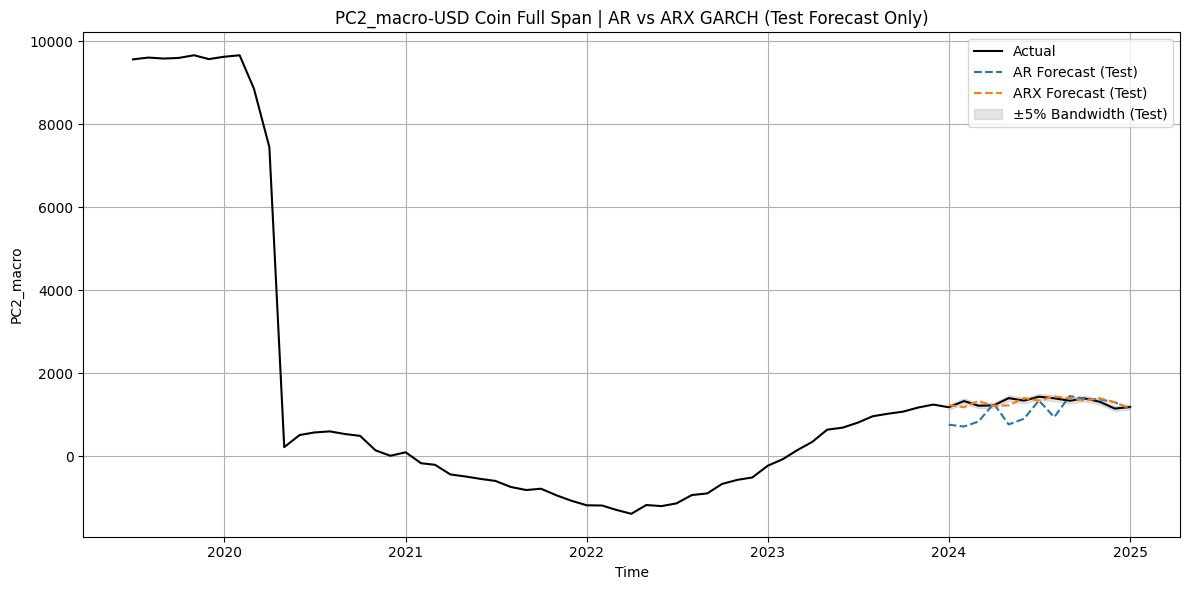


✅ Best lag for PC2_macro-USD Coin is 4 with MAPE improvement -67.94%


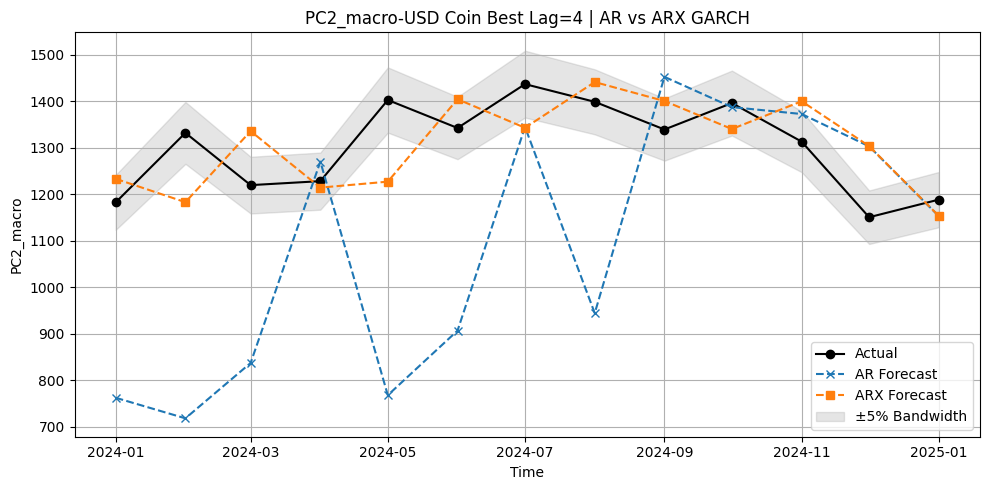

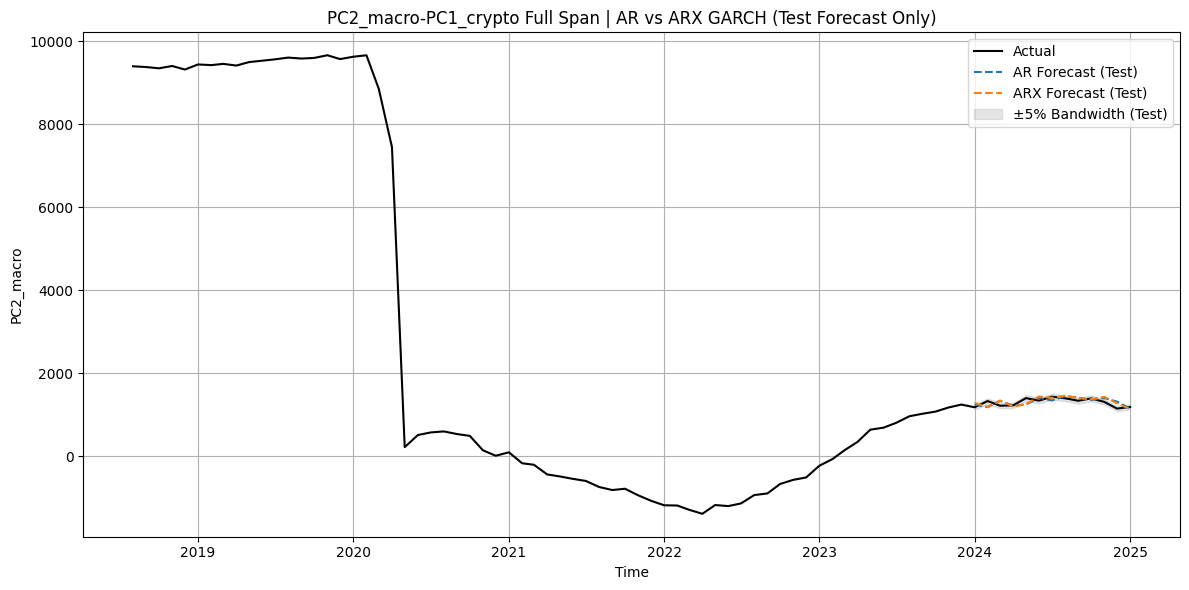


✅ Best lag for PC2_macro-PC1_crypto is 0 with MAPE improvement 0.36%


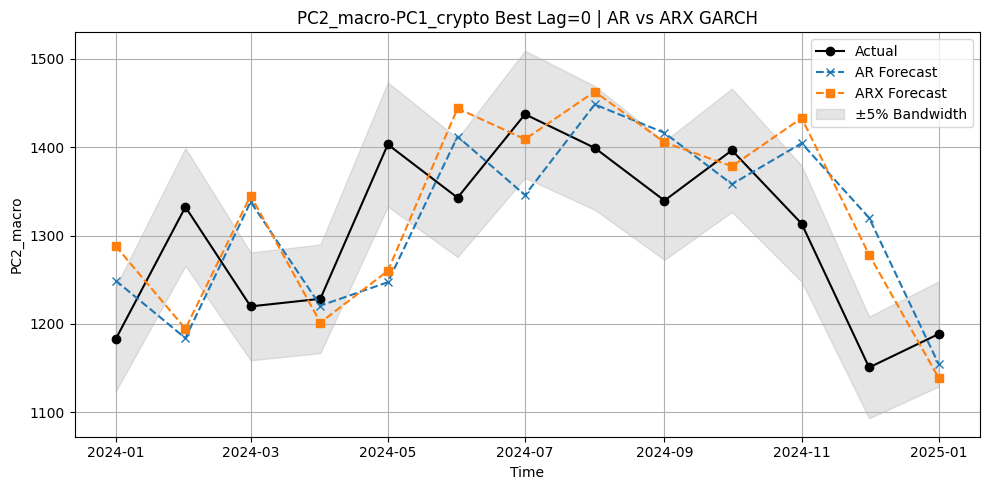

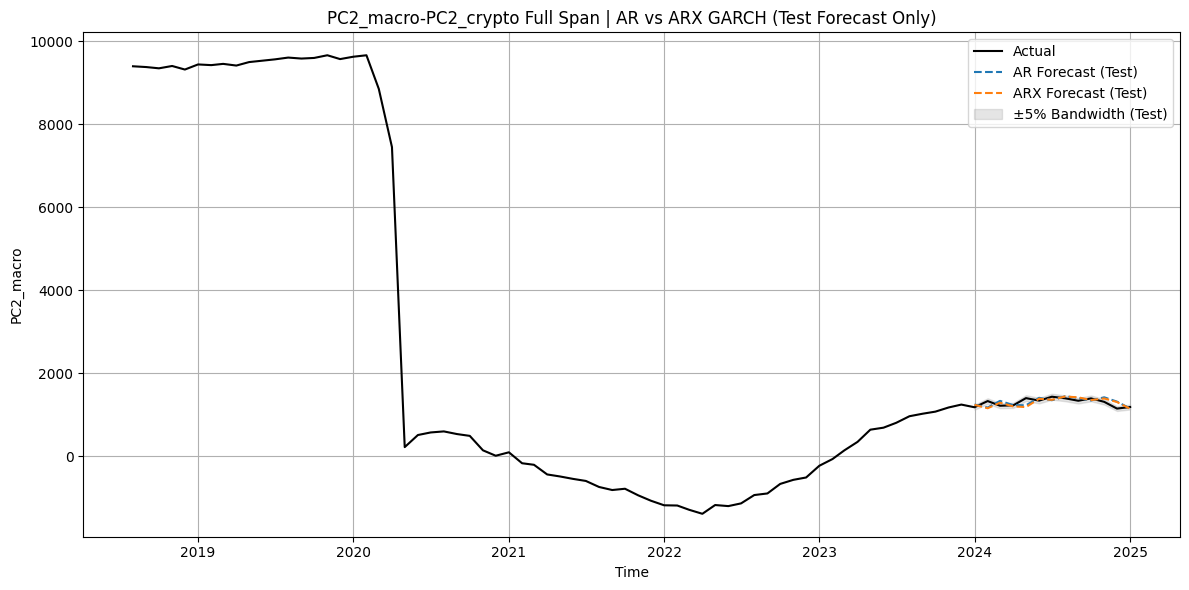


✅ Best lag for PC2_macro-PC2_crypto is 5 with MAPE improvement -3.42%


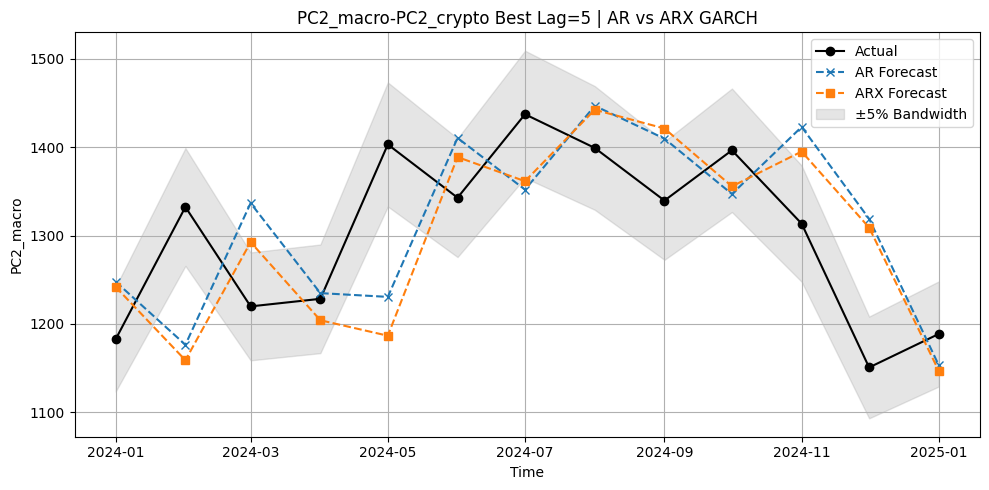

,Macro,Crypto,p,q,Exog Lag,MAPE_AR,MAPE_ARX,R2_AR,R2_ARX,MAPE_Improvement(%)
5,PC2_macro,USD Coin,1,1,4,20.220060,6.482667,-12.729833,-0.087745,-67.939424
1,PC1_macro,USD Coin,1,1,4,3.484924,3.108405,0.259254,0.311939,-10.804220
3,PC1_macro,PC2_crypto,1,1,6,3.101897,2.812066,0.367993,0.411197,-9.343660
0,PC1_macro,Tether,1,1,5,3.221961,2.960533,0.355085,0.326058,-8.113945
2,PC1_macro,PC1_crypto,1,1,6,3.101897,2.925038,0.367993,0.394744,-5.701637
4,PC2_macro,Tether,1,1,1,6.908174,6.641114,-0.237403,-0.136644,-3.865856
7,PC2_macro,PC2_crypto,1,1,5,6.817985,6.584595,-0.193508,-0.218072,-3.423141
6,PC2_macro,PC1_crypto,1,1,0,6.630507,6.654089,-0.112925,-0.059002,0.355661


In [7]:
# Format: ('macro_name', 'crypto_name'): {'p': x, 'q': y, 'lag': z}
pair_orders = {
    ('PC1_macro', 'Tether'): {'p': 1, 'q': 1, 'lag': 0},
    ('PC1_macro', 'USD Coin'): {'p': 1, 'q': 1, 'lag': 4},
    ('PC1_macro', 'PC1_crypto'): {'p': 1, 'q': 1, 'lag': 1},
    ('PC1_macro', 'PC2_crypto'): {'p': 1, 'q':1, 'lag': 1},
    # #adding VIX and MOVE
    # ('PC1_macro', 'VIX'): {'p': 1, 'q':1, 'lag': 0},
    # ('PC1_macro', 'MOVE'): {'p': 1, 'q':1, 'lag': 0},

    ('PC2_macro', 'Tether'): {'p': 1, 'q': 1, 'lag': 0},
    ('PC2_macro', 'USD Coin'): {'p': 1, 'q': 1, 'lag': 2},
    ('PC2_macro', 'PC1_crypto'): {'p': 1, 'q': 1, 'lag': 0},
    ('PC2_macro', 'PC2_crypto'): {'p': 1, 'q': 1, 'lag': 0},
    #     #adding VIX and MOVE
    # ('PC2_macro', 'VIX'): {'p': 1, 'q':1, 'lag': 0},
    # ('PC2_macro', 'MOVE'): {'p': 1, 'q':1, 'lag': 0},

}

from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def safe_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100 if np.any(mask) else np.nan

def rolling_forecast_ar(y_train_scaled, y_test_scaled, p, q, l):
    history = list(y_train_scaled)
    preds = []
    for t in range(len(y_test_scaled)):
        model = arch_model(history, mean='AR', lags=l, vol='GARCH', p=p, q=q, dist='normal', rescale=False)
        res = model.fit(disp='off')
        forecast = res.forecast(horizon=1, method='analytic')
        pred = forecast.mean.values[-1, 0]
        preds.append(pred)
        history.append(y_test_scaled[t])
    return np.array(preds)

def rolling_forecast_arx(y_train_scaled, x_train_scaled, y_test_scaled, x_test_scaled, p, q, l):
    history_y = list(y_train_scaled)
    history_x = list(x_train_scaled)
    preds = []
    for t in range(len(y_test_scaled)):
        x_arr = np.array(history_x)
        model = arch_model(history_y, mean='ARX', lags=l, vol='GARCH', p=p, q=q, x=x_arr, dist='normal', rescale=False)
        res = model.fit(disp='off')
        const = res.params.get('Const', 0)
        phi = res.params.get('y[1]', 0)
        beta = res.params.get('x0', 0)
        y_t = history_y[-1]
        x_t1 = x_test_scaled[t]
        pred = const + phi * y_t + beta * x_t1
        preds.append(pred)
        history_y.append(y_test_scaled[t])
        history_x.append(x_test_scaled[t])
    return np.array(preds)

results = []

for (macro, asset), base_params in pair_orders.items():
    if f'{macro}_diff_diff' in df.columns:
        y_col = f'{macro}_diff_diff'
    elif f'{macro}_diff' in df.columns:
        y_col = f'{macro}_diff'
    else:
        y_col = macro

    if macro not in df.columns or asset not in df.columns:
        print(f"Skipping {macro}-{asset}: missing in DataFrame")
        continue

    p, q = base_params['p'], base_params['q']
    best_result = None

    for lag in range(0, 7):
        df_temp = df[[y_col, asset]].copy()
        df_temp[asset] = df_temp[asset].shift(lag)
        df_temp.dropna(inplace=True)

        if len(df_temp) < 30:
            continue

        if df_temp[y_col].var() == 0 or df_temp[asset].var() == 0:
            continue

        # Train-test split
        # train_size = int(len(df_temp) * 0.85)
        # df_train, df_test = df_temp.iloc[:train_size], df_temp.iloc[train_size:]
        cutoff_date = pd.to_datetime('2024-01-01')
        df_train = df_temp[df_temp.index < cutoff_date]
        df_test = df_temp[df_temp.index >= cutoff_date]


        scaler_y = StandardScaler()
        scaler_x = StandardScaler()
        y_train_scaled = scaler_y.fit_transform(df_train[[y_col]]).flatten()
        x_train_scaled = scaler_x.fit_transform(df_train[[asset]]).flatten()
        y_test_scaled = scaler_y.transform(df_test[[y_col]]).flatten()
        x_test_scaled = scaler_x.transform(df_test[[asset]]).flatten()

        try:
            pred_ar_scaled = rolling_forecast_ar(y_train_scaled, y_test_scaled, p, q, 1)
            pred_arx_scaled = rolling_forecast_arx(y_train_scaled, x_train_scaled, y_test_scaled, x_test_scaled, p, q, 1)

            pred_ar = scaler_y.inverse_transform(pred_ar_scaled.reshape(-1, 1)).flatten()
            pred_arx = scaler_y.inverse_transform(pred_arx_scaled.reshape(-1, 1)).flatten()
            y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
            index_test = df_test.index

            mse_ar = mean_squared_error(y_actual, pred_ar)
            mse_arx = mean_squared_error(y_actual, pred_arx)
            r2_ar = r2_score(y_actual, pred_ar)
            r2_arx = r2_score(y_actual, pred_arx)
            mape_ar = safe_mape(y_actual, pred_ar)
            mape_arx = safe_mape(y_actual, pred_arx)
            mape_change = ((mape_arx - mape_ar) / mape_ar) * 100 if mape_ar != 0 else np.nan

            if best_result is None or (mape_change < best_result['MAPE_Improvement(%)']):
                best_result = {
                    'Macro': macro,
                    'Crypto': asset,
                    'p': p,
                    'q': q,
                    'Exog Lag': lag,
                    'MAPE_AR': mape_ar,
                    'MAPE_ARX': mape_arx,
                    'R2_AR': r2_ar,
                    'R2_ARX': r2_arx,
                    'MAPE_Improvement(%)': mape_change,
                    'index_test': index_test,
                    'y_actual': y_actual,
                    'pred_ar': pred_ar,
                    'pred_arx': pred_arx,
                    'y_col': y_col
                }

        except Exception as e:
            print(f"⚠️ Forecast failed for {macro}-{asset} lag={lag}: {e}")

    if best_result:
        # Plot full span: training + test, but forecasts only during test
        full_index = df_temp.index
        full_actual = df_temp[best_result['y_col']].values

        # Create empty forecast arrays with NaNs for train period
        full_pred_ar = np.full(len(full_index), np.nan)
        full_pred_arx = np.full(len(full_index), np.nan)

        # Fill in test period forecasts
        test_start_idx = full_index.get_loc(best_result['index_test'][0])
        full_pred_ar[test_start_idx:test_start_idx + len(best_result['pred_ar'])] = best_result['pred_ar']
        full_pred_arx[test_start_idx:test_start_idx + len(best_result['pred_arx'])] = best_result['pred_arx']

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(full_index, full_actual, label='Actual', color='black')
        plt.plot(full_index, full_pred_ar, label='AR Forecast (Test)', linestyle='--')
        plt.plot(full_index, full_pred_arx, label='ARX Forecast (Test)', linestyle='--')
        plt.fill_between(
            best_result['index_test'],
            best_result['y_actual'] * 0.95,
            best_result['y_actual'] * 1.05,
            color='gray',
            alpha=0.2,
            label='±5% Bandwidth (Test)'
        )
        plt.title(f"{macro}-{asset} Full Span | AR vs ARX GARCH (Test Forecast Only)")
        plt.xlabel("Time")
        plt.ylabel(best_result['y_col'])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


        results.append({k: v for k, v in best_result.items() if k not in ['index_test', 'y_actual', 'pred_ar', 'pred_arx', 'y_col']})

        print(f"\n✅ Best lag for {macro}-{asset} is {best_result['Exog Lag']} with MAPE improvement {best_result['MAPE_Improvement(%)']:.2f}%")

        # Plot best result
        plt.figure(figsize=(10, 5))
        plt.plot(best_result['index_test'], best_result['y_actual'], label='Actual', color='black', marker='o')
        plt.plot(best_result['index_test'], best_result['pred_ar'], label='AR Forecast', linestyle='--', marker='x')
        plt.plot(best_result['index_test'], best_result['pred_arx'], label='ARX Forecast', linestyle='--', marker='s')
        plt.fill_between(best_result['index_test'], best_result['y_actual'] * 0.95, best_result['y_actual'] * 1.05, color='gray', alpha=0.2, label='±5% Bandwidth')
        plt.title(f"{macro}-{asset} Best Lag={best_result['Exog Lag']} | AR vs ARX GARCH")
        plt.xlabel("Time")
        plt.ylabel(best_result['y_col'])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

results_df = pd.DataFrame(results)
display(results_df.sort_values('MAPE_Improvement(%)'))


# Optimized results with varied p,q and lag

⚠️ Forecast failed for PC1_macro-Tether p=0, q=0, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=0, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=0, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=0, lag=3: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=0, lag=4: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=0, lag=5: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=0, lag=6: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=1, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=1, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-Tether p=0, q=1, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_mac

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=2, q=2, lag=1) for PC1_macro-Tether | MAPE ↓ -20.65%


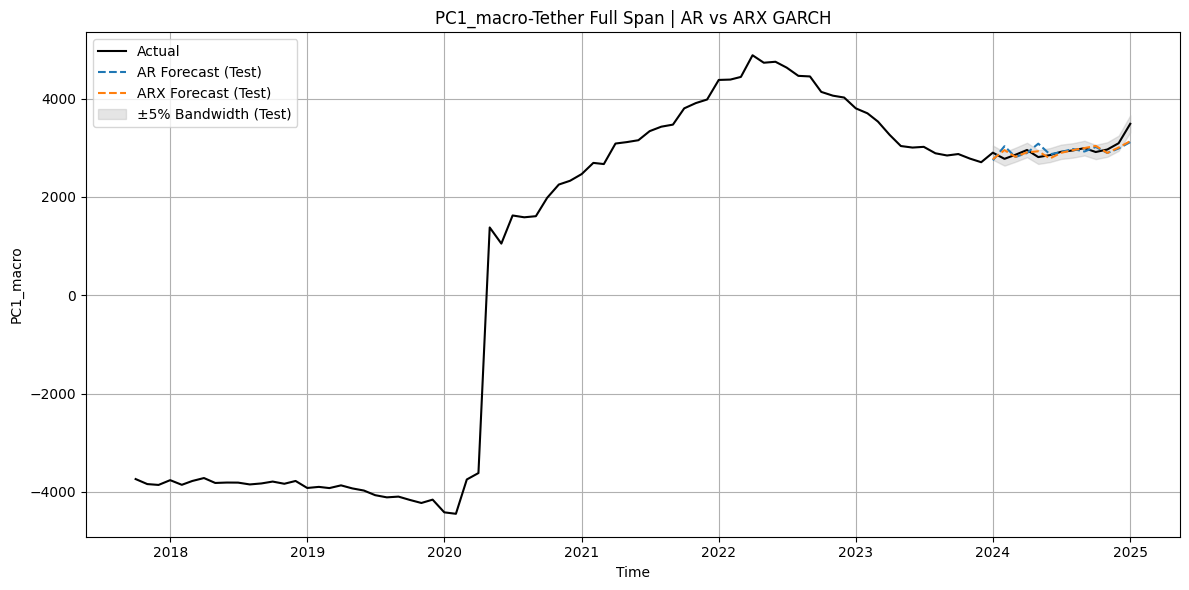

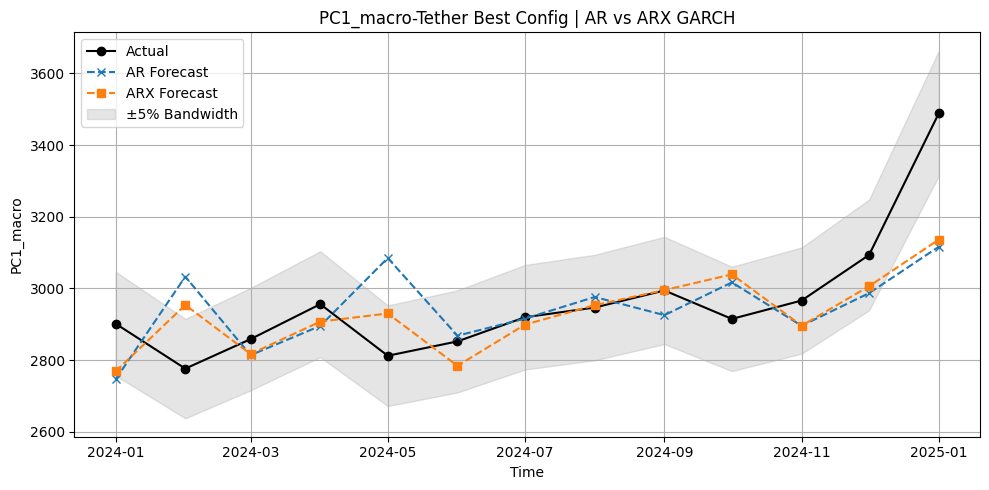

⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=0, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=0, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=0, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=0, lag=3: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=0, lag=4: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=0, lag=5: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=0, lag=6: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=1, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=1, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-USD Coin p=0, q=1, lag=2: One of p or o must be strictly positive
⚠️ Forecas

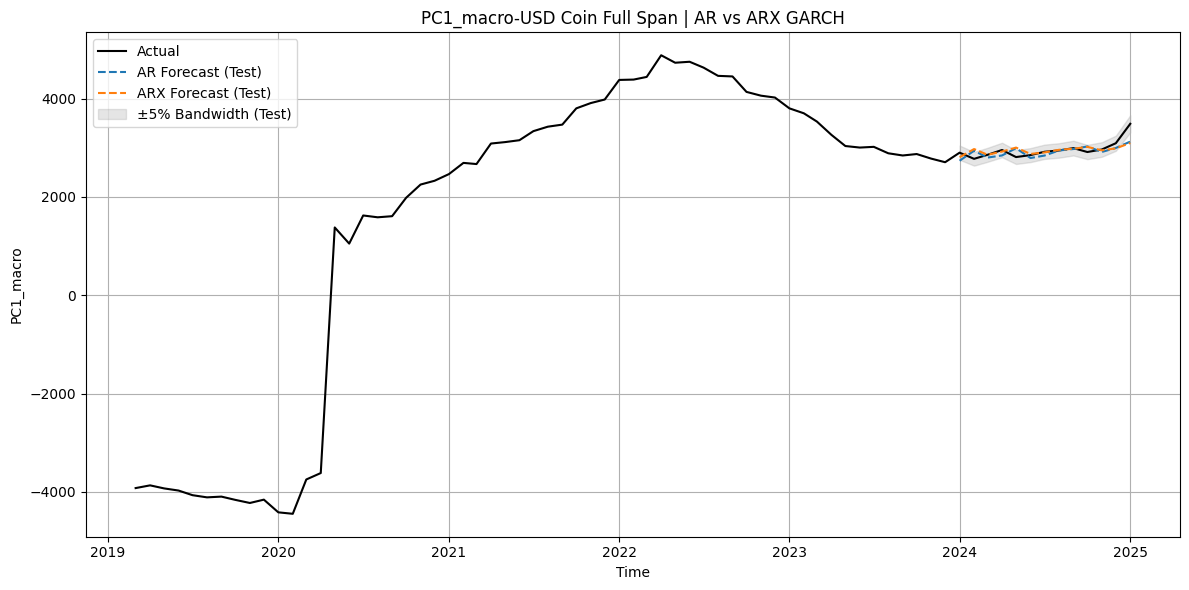

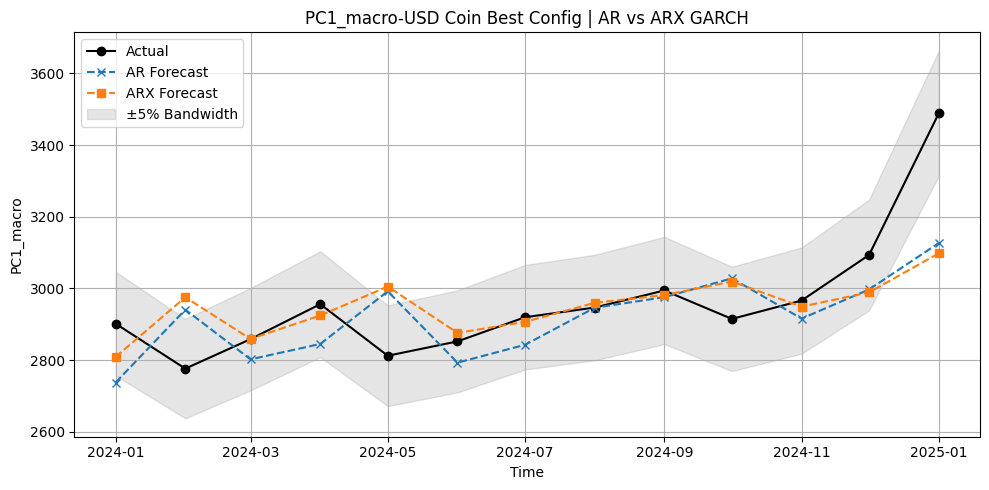

⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=0, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=0, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=0, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=0, lag=3: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=0, lag=4: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=0, lag=5: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=0, lag=6: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=1, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=1, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC1_crypto p=0, q=1, lag=2: One of p or o must be strictly

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=2, q=2, lag=0) for PC1_macro-PC1_crypto | MAPE ↓ -9.39%


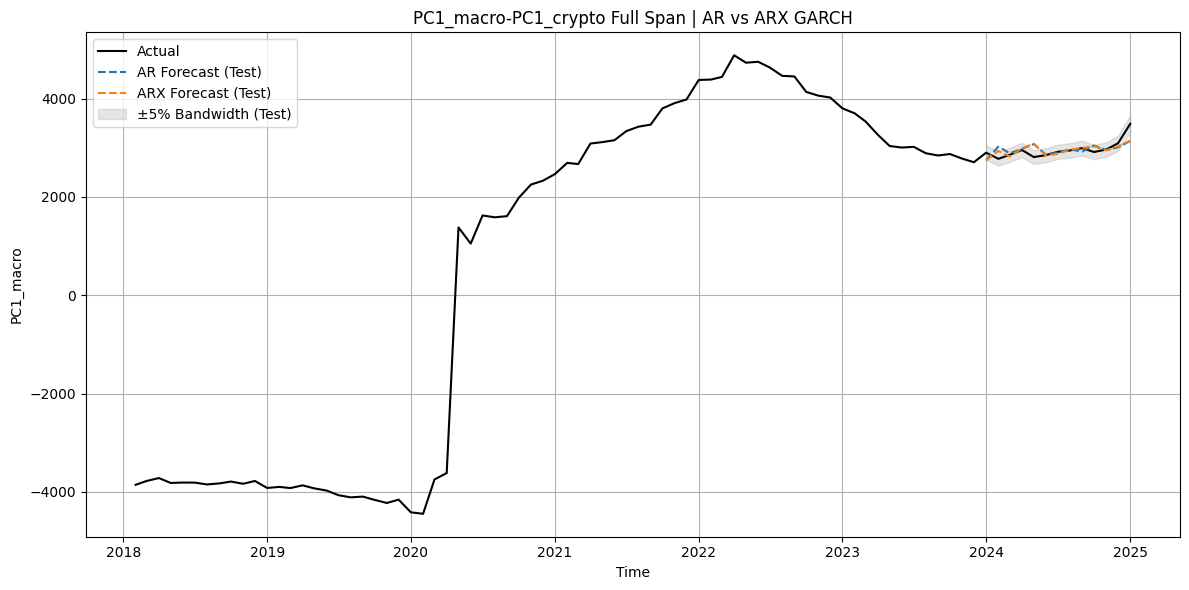

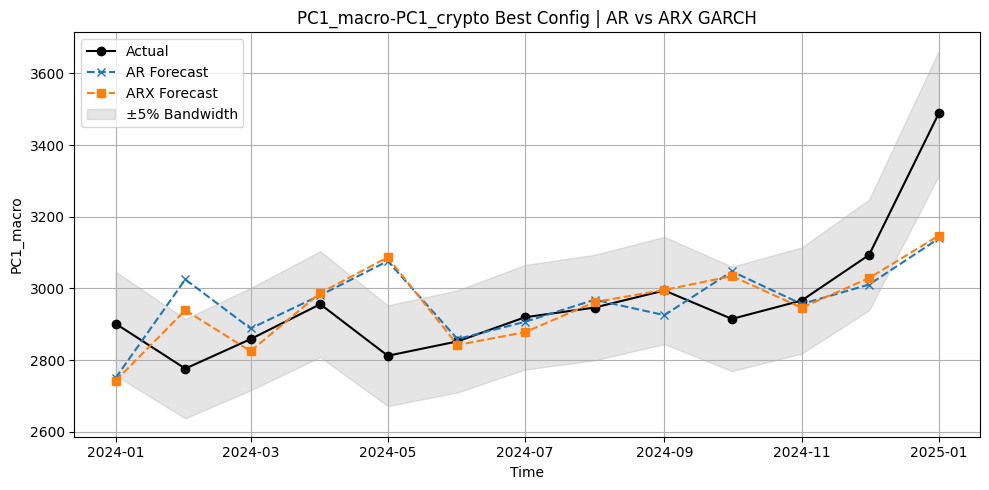

⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=0, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=0, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=0, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=0, lag=3: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=0, lag=4: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=0, lag=5: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=0, lag=6: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=1, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=1, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC1_macro-PC2_crypto p=0, q=1, lag=2: One of p or o must be strictly

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=2, q=2, lag=6) for PC1_macro-PC2_crypto | MAPE ↓ -9.86%


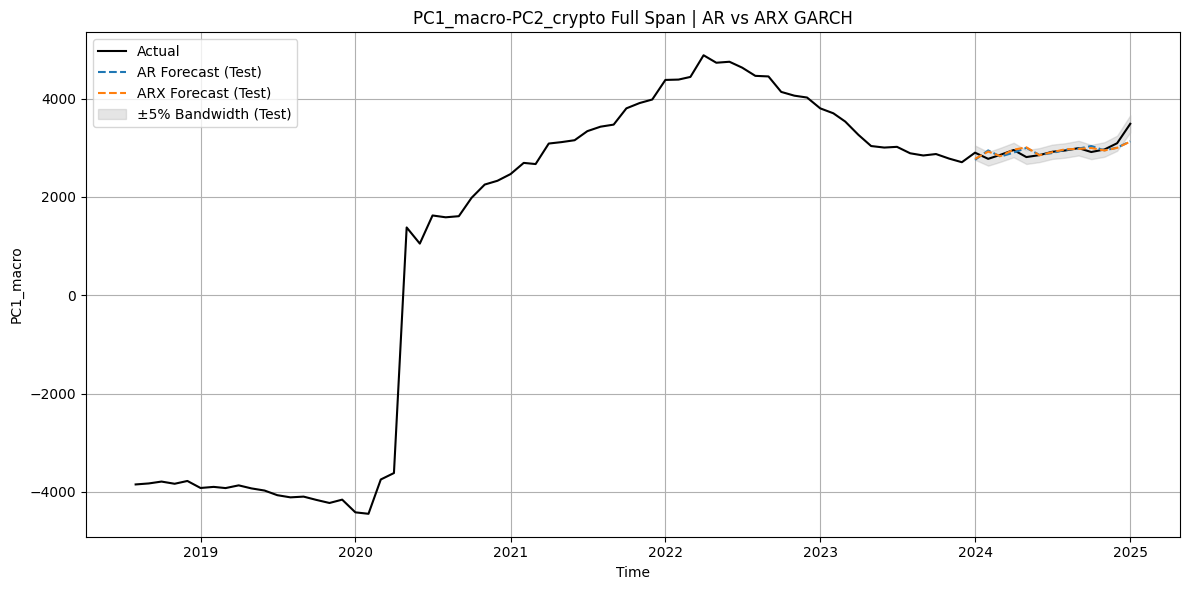

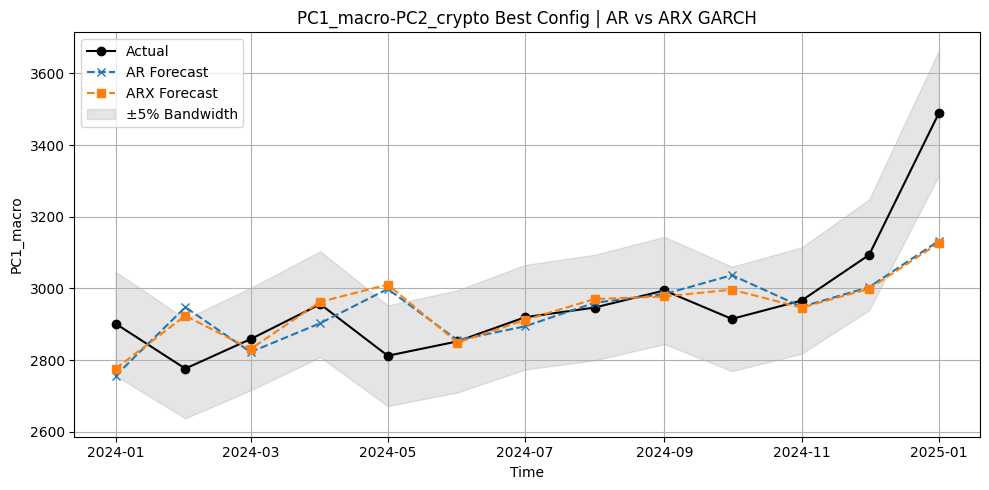

⚠️ Forecast failed for PC2_macro-Tether p=0, q=0, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=0, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=0, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=0, lag=3: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=0, lag=4: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=0, lag=5: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=0, lag=6: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=1, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=1, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-Tether p=0, q=1, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_mac

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSURE


✅ Best (p=1, q=0, lag=3) for PC2_macro-Tether | MAPE ↓ -9.43%


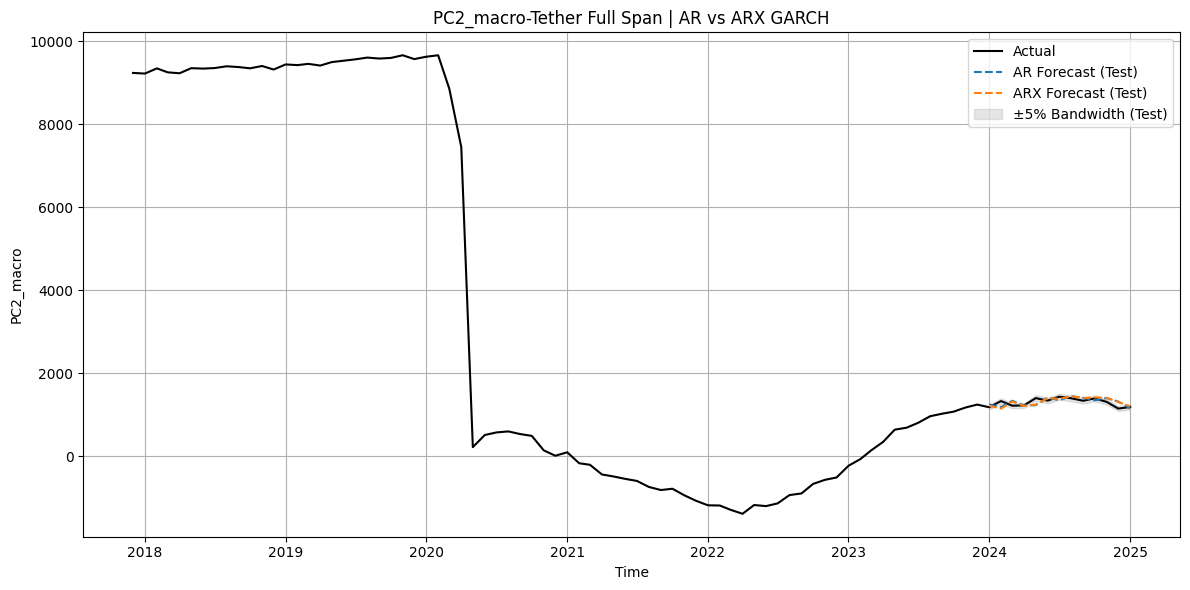

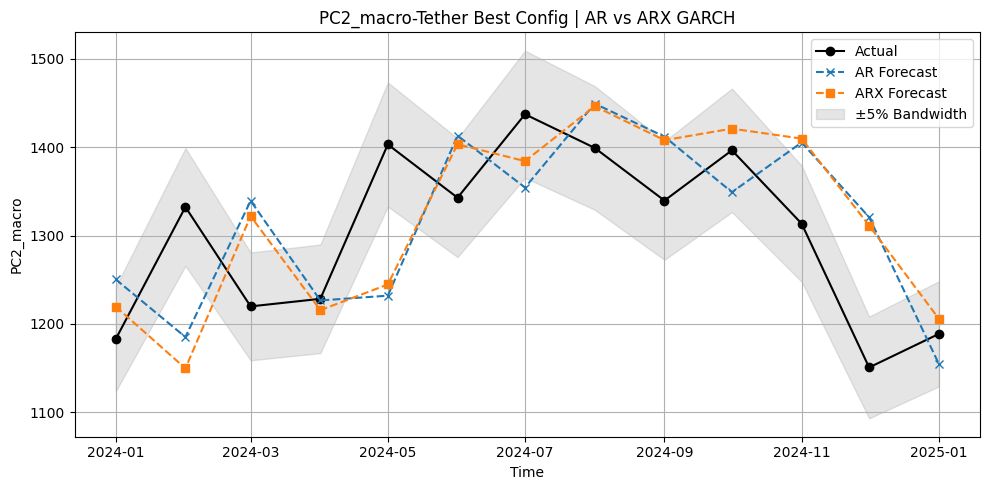

⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=0, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=0, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=0, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=0, lag=3: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=0, lag=4: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=0, lag=5: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=0, lag=6: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=1, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=1, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-USD Coin p=0, q=1, lag=2: One of p or o must be strictly positive
⚠️ Forecas

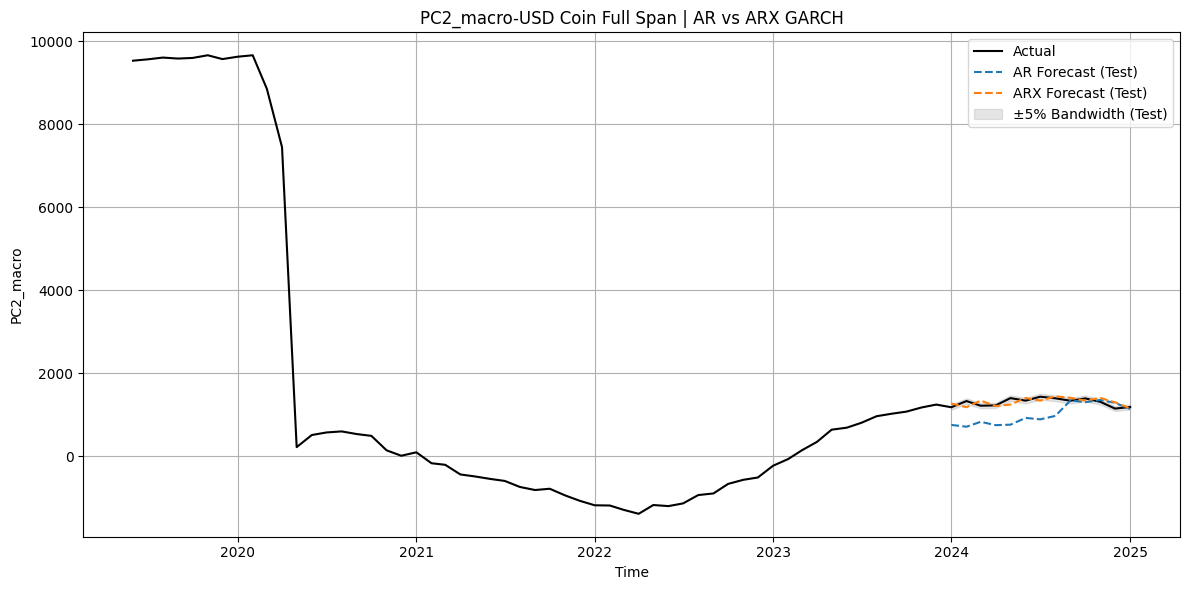

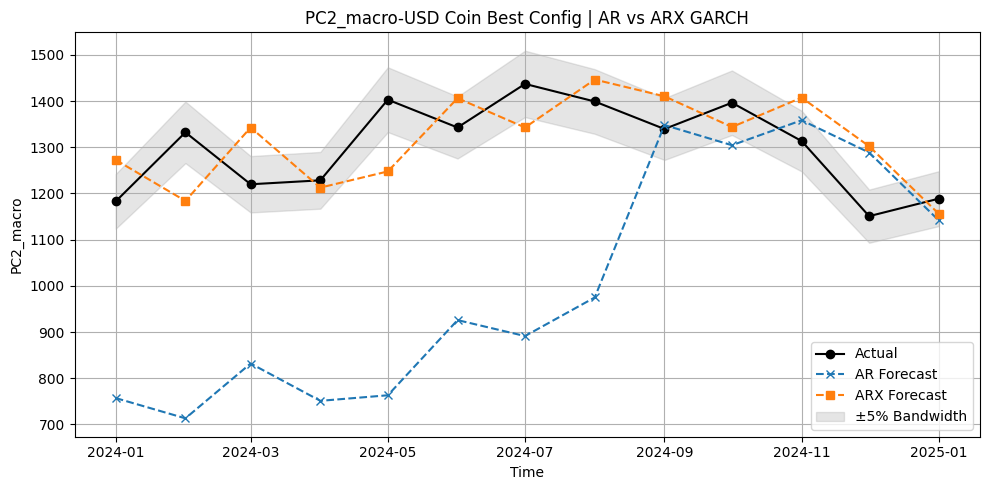

⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=0, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=0, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=0, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=0, lag=3: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=0, lag=4: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=0, lag=5: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=0, lag=6: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=1, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=1, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC1_crypto p=0, q=1, lag=2: One of p or o must be strictly

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=1, q=2, lag=5) for PC2_macro-PC1_crypto | MAPE ↓ -9.80%


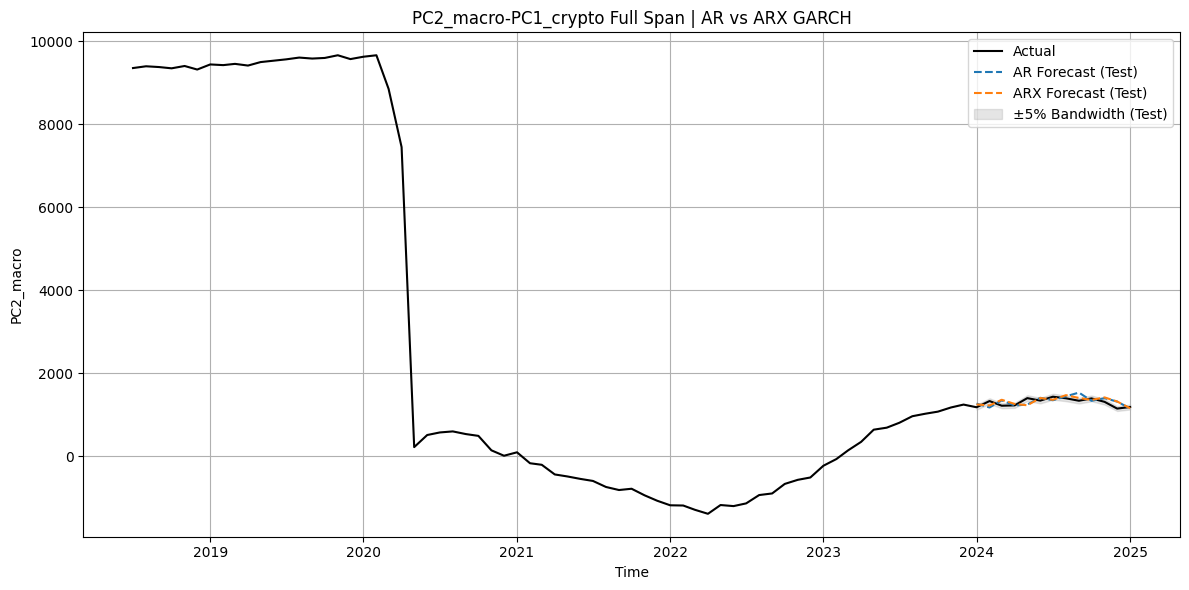

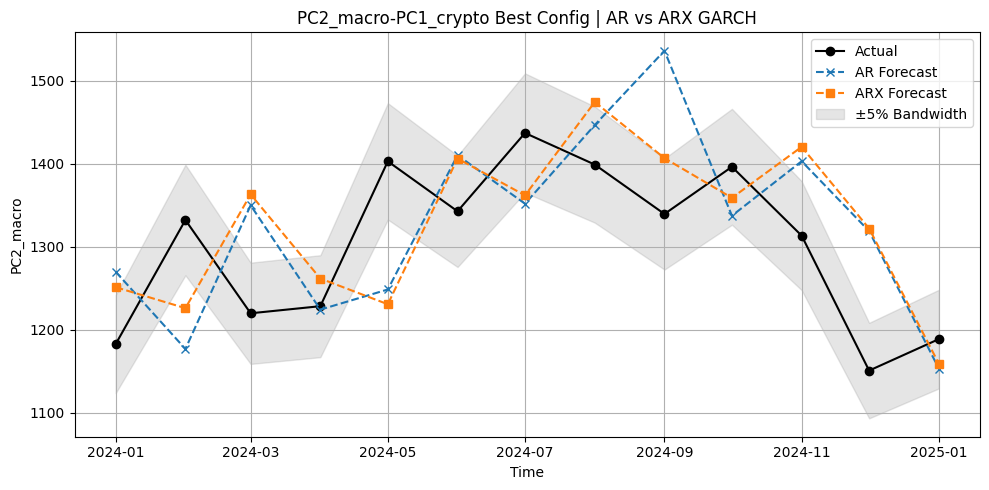

⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=0, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=0, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=0, lag=2: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=0, lag=3: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=0, lag=4: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=0, lag=5: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=0, lag=6: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=1, lag=0: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=1, lag=1: One of p or o must be strictly positive
⚠️ Forecast failed for PC2_macro-PC2_crypto p=0, q=1, lag=2: One of p or o must be strictly

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=1, q=2, lag=5) for PC2_macro-PC2_crypto | MAPE ↓ -11.99%


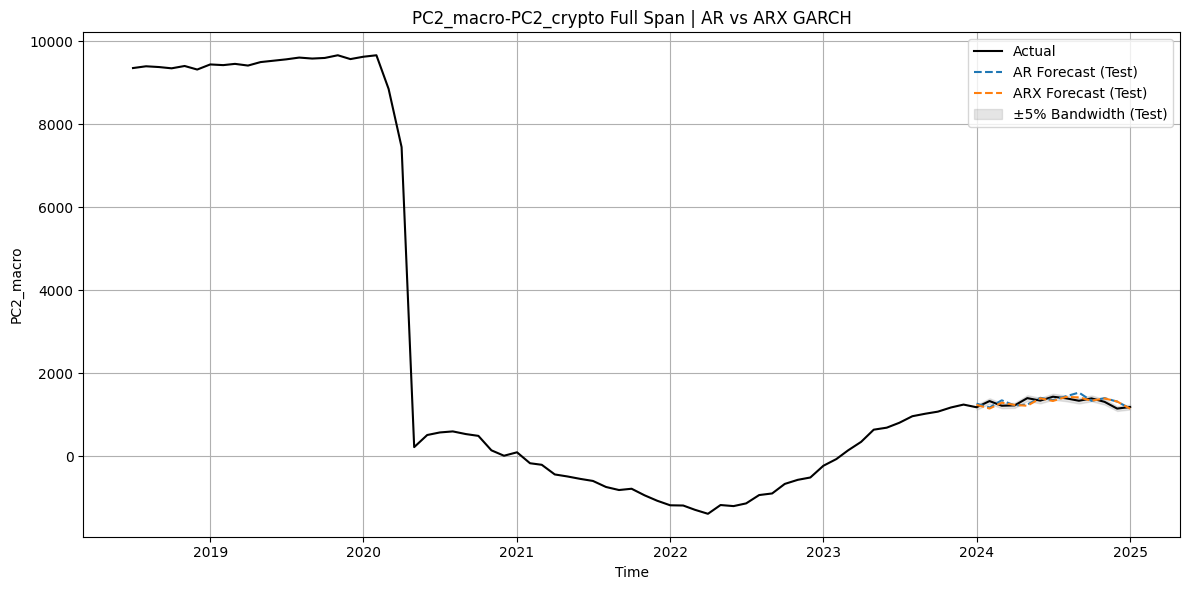

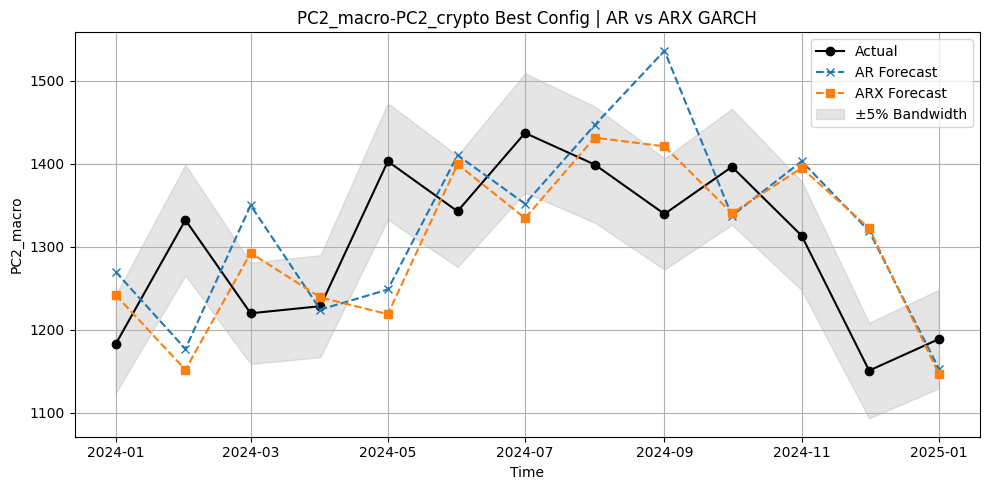

,Macro,Crypto,p,q,Exog Lag,MAPE_AR,MAPE_ARX,R2_AR,R2_ARX,MAPE_Improvement(%)
5,PC2_macro,USD Coin,1,2,5,24.975439,6.766759,-17.023476,-0.109593,-72.906346
0,PC1_macro,Tether,2,2,1,3.995189,3.170216,0.109618,0.414285,-20.649162
1,PC1_macro,USD Coin,2,0,2,3.705048,3.017748,0.302902,0.315978,-18.550374
7,PC2_macro,PC2_crypto,1,2,5,7.595128,6.684596,-0.472926,-0.219775,-11.988365
3,PC1_macro,PC2_crypto,2,2,6,3.119726,2.812218,0.373152,0.411235,-9.856877
6,PC2_macro,PC1_crypto,1,2,5,7.595128,6.851077,-0.472926,-0.152721,-9.796418
4,PC2_macro,Tether,1,0,3,6.679812,6.049628,-0.149876,-0.058559,-9.434160
2,PC1_macro,PC1_crypto,2,2,0,3.598034,3.260340,0.196200,0.303621,-9.385534


In [ ]:
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Forecasting utility
def safe_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100 if np.any(mask) else np.nan

def rolling_forecast_ar(y_train_scaled, y_test_scaled, p, q, l):
    history = list(y_train_scaled)
    preds = []
    for t in range(len(y_test_scaled)):
        model = arch_model(history, mean='AR', lags=l, vol='GARCH', p=p, q=q, dist='normal', rescale=False)
        res = model.fit(disp='off')
        forecast = res.forecast(horizon=1, method='analytic')
        pred = forecast.mean.values[-1, 0]
        preds.append(pred)
        history.append(y_test_scaled[t])
    return np.array(preds)

def rolling_forecast_arx(y_train_scaled, x_train_scaled, y_test_scaled, x_test_scaled, p, q, l):
    history_y = list(y_train_scaled)
    history_x = list(x_train_scaled)
    preds = []
    for t in range(len(y_test_scaled)):
        x_arr = np.array(history_x)
        model = arch_model(history_y, mean='ARX', lags=l, vol='GARCH', p=p, q=q, x=x_arr, dist='normal', rescale=False)
        res = model.fit(disp='off')
        const = res.params.get('Const', 0)
        phi = res.params.get('y[1]', 0)
        beta = res.params.get('x0', 0)
        y_t = history_y[-1]
        x_t1 = x_test_scaled[t]
        pred = const + phi * y_t + beta * x_t1
        preds.append(pred)
        history_y.append(y_test_scaled[t])
        history_x.append(x_test_scaled[t])
    return np.array(preds)

# Pair definition
pair_orders = {
    ('PC1_macro', 'Tether'): {'lag': 0},
    ('PC1_macro', 'USD Coin'): {'lag': 4},
    ('PC1_macro', 'PC1_crypto'): {'lag': 1},
    ('PC1_macro', 'PC2_crypto'): {'lag': 1},
    ('PC2_macro', 'Tether'): {'lag': 0},
    ('PC2_macro', 'USD Coin'): {'lag': 2},
    ('PC2_macro', 'PC1_crypto'): {'lag': 0},
    ('PC2_macro', 'PC2_crypto'): {'lag': 0},
}

# Storage
all_results = []
best_results = []

# Grid search
for (macro, asset), _ in pair_orders.items():
    if f'{macro}_diff_diff' in df.columns:
        y_col = f'{macro}_diff_diff'
    elif f'{macro}_diff' in df.columns:
        y_col = f'{macro}_diff'
    else:
        y_col = macro

    if macro not in df.columns or asset not in df.columns:
        print(f"Skipping {macro}-{asset}: missing in DataFrame")
        continue

    best_result = None

    for p in range(0, 3):
        for q in range(0, 3):
            for lag in range(0, 7):
                df_temp = df[[y_col, asset]].copy()
                df_temp[asset] = df_temp[asset].shift(lag)
                df_temp.dropna(inplace=True)

                if len(df_temp) < 30 or df_temp[y_col].var() == 0 or df_temp[asset].var() == 0:
                    continue

                cutoff_date = pd.to_datetime('2024-01-01')
                df_train = df_temp[df_temp.index < cutoff_date]
                df_test = df_temp[df_temp.index >= cutoff_date]

                if len(df_test) == 0 or len(df_train) < 10:
                    continue

                scaler_y = StandardScaler()
                scaler_x = StandardScaler()
                y_train_scaled = scaler_y.fit_transform(df_train[[y_col]]).flatten()
                x_train_scaled = scaler_x.fit_transform(df_train[[asset]]).flatten()
                y_test_scaled = scaler_y.transform(df_test[[y_col]]).flatten()
                x_test_scaled = scaler_x.transform(df_test[[asset]]).flatten()

                try:
                    pred_ar_scaled = rolling_forecast_ar(y_train_scaled, y_test_scaled, p, q, 1)
                    pred_arx_scaled = rolling_forecast_arx(y_train_scaled, x_train_scaled, y_test_scaled, x_test_scaled, p, q, 1)

                    pred_ar = scaler_y.inverse_transform(pred_ar_scaled.reshape(-1, 1)).flatten()
                    pred_arx = scaler_y.inverse_transform(pred_arx_scaled.reshape(-1, 1)).flatten()
                    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
                    index_test = df_test.index

                    mse_ar = mean_squared_error(y_actual, pred_ar)
                    mse_arx = mean_squared_error(y_actual, pred_arx)
                    r2_ar = r2_score(y_actual, pred_ar)
                    r2_arx = r2_score(y_actual, pred_arx)
                    mape_ar = safe_mape(y_actual, pred_ar)
                    mape_arx = safe_mape(y_actual, pred_arx)
                    mape_change = ((mape_arx - mape_ar) / mape_ar) * 100 if mape_ar != 0 else np.nan

                    result_entry = {
                        'Macro': macro,
                        'Crypto': asset,
                        'p': p,
                        'q': q,
                        'Exog Lag': lag,
                        'MAPE_AR': mape_ar,
                        'MAPE_ARX': mape_arx,
                        'R2_AR': r2_ar,
                        'R2_ARX': r2_arx,
                        'MAPE_Improvement(%)': mape_change,
                    }

                    all_results.append(result_entry)

                    if best_result is None or (mape_change < best_result['MAPE_Improvement(%)']):
                        best_result = result_entry.copy()
                        best_result.update({
                            'index_test': index_test,
                            'y_actual': y_actual,
                            'pred_ar': pred_ar,
                            'pred_arx': pred_arx,
                            'y_col': y_col,
                            'full_index': df_temp.index,
                            'full_actual': df_temp[y_col].values
                        })

                except Exception as e:
                    print(f"⚠️ Forecast failed for {macro}-{asset} p={p}, q={q}, lag={lag}: {e}")

    if best_result:
        best_results.append({k: v for k, v in best_result.items() if k not in ['index_test', 'y_actual', 'pred_ar', 'pred_arx', 'y_col', 'full_index', 'full_actual']})
        print(f"\n✅ Best (p={best_result['p']}, q={best_result['q']}, lag={best_result['Exog Lag']}) for {macro}-{asset} | MAPE ↓ {best_result['MAPE_Improvement(%)']:.2f}%")

        # Full span forecast plot
        full_pred_ar = np.full(len(best_result['full_index']), np.nan)
        full_pred_arx = np.full(len(best_result['full_index']), np.nan)
        test_start_idx = best_result['full_index'].get_loc(best_result['index_test'][0])
        full_pred_ar[test_start_idx:test_start_idx + len(best_result['pred_ar'])] = best_result['pred_ar']
        full_pred_arx[test_start_idx:test_start_idx + len(best_result['pred_arx'])] = best_result['pred_arx']

        plt.figure(figsize=(12, 6))
        plt.plot(best_result['full_index'], best_result['full_actual'], label='Actual', color='black')
        plt.plot(best_result['full_index'], full_pred_ar, label='AR Forecast (Test)', linestyle='--')
        plt.plot(best_result['full_index'], full_pred_arx, label='ARX Forecast (Test)', linestyle='--')
        plt.fill_between(
            best_result['index_test'],
            best_result['y_actual'] * 0.95,
            best_result['y_actual'] * 1.05,
            color='gray', alpha=0.2, label='±5% Bandwidth (Test)'
        )
        plt.title(f"{macro}-{asset} Full Span | AR vs ARX GARCH")
        plt.xlabel("Time")
        plt.ylabel(best_result['y_col'])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Test period plot
        plt.figure(figsize=(10, 5))
        plt.plot(best_result['index_test'], best_result['y_actual'], label='Actual', color='black', marker='o')
        plt.plot(best_result['index_test'], best_result['pred_ar'], label='AR Forecast', linestyle='--', marker='x')
        plt.plot(best_result['index_test'], best_result['pred_arx'], label='ARX Forecast', linestyle='--', marker='s')
        plt.fill_between(best_result['index_test'], best_result['y_actual'] * 0.95, best_result['y_actual'] * 1.05, color='gray', alpha=0.2, label='±5% Bandwidth')
        plt.title(f"{macro}-{asset} Best Config | AR vs ARX GARCH")
        plt.xlabel("Time")
        plt.ylabel(best_result['y_col'])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Final tables
all_results_df = pd.DataFrame(all_results)
best_results_df = pd.DataFrame(best_results)

# Show sorted output
display(best_results_df.sort_values('MAPE_Improvement(%)'))


# With named PCs

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=2, q=2, lag=1) for Demand and Trade Activity - Tether | MAPE ↓ -20.65%


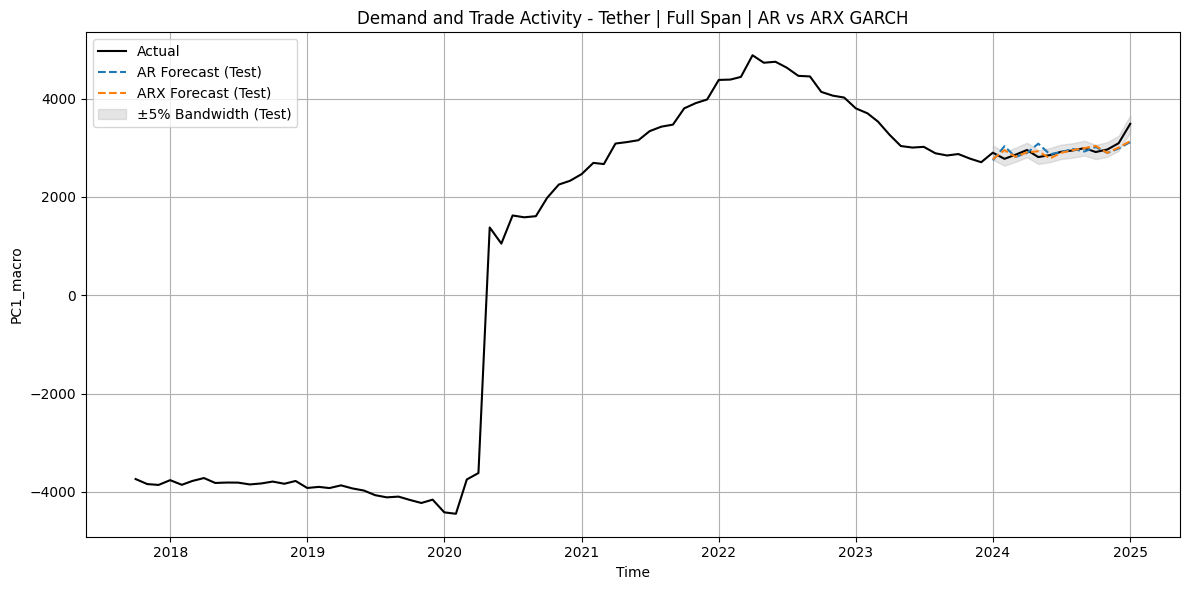

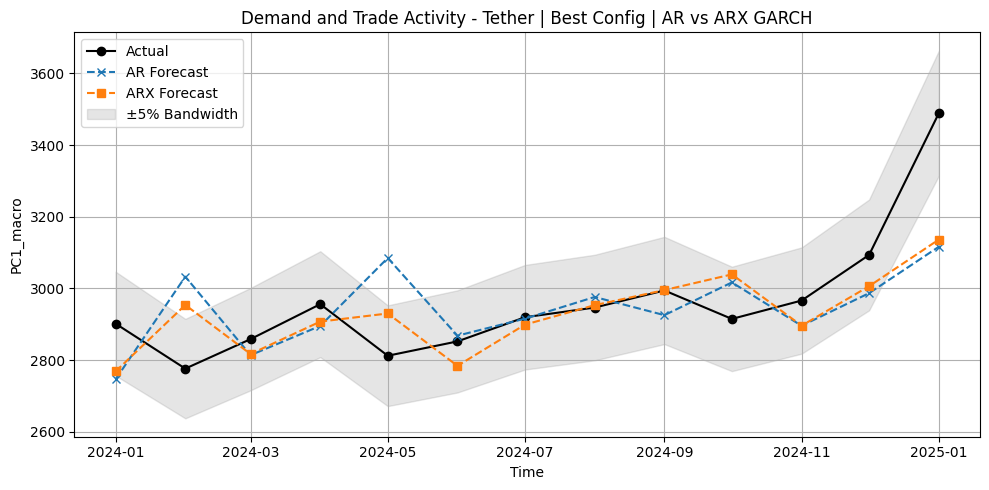


✅ Best (p=2, q=0, lag=2) for Demand and Trade Activity - USD Coin | MAPE ↓ -18.55%


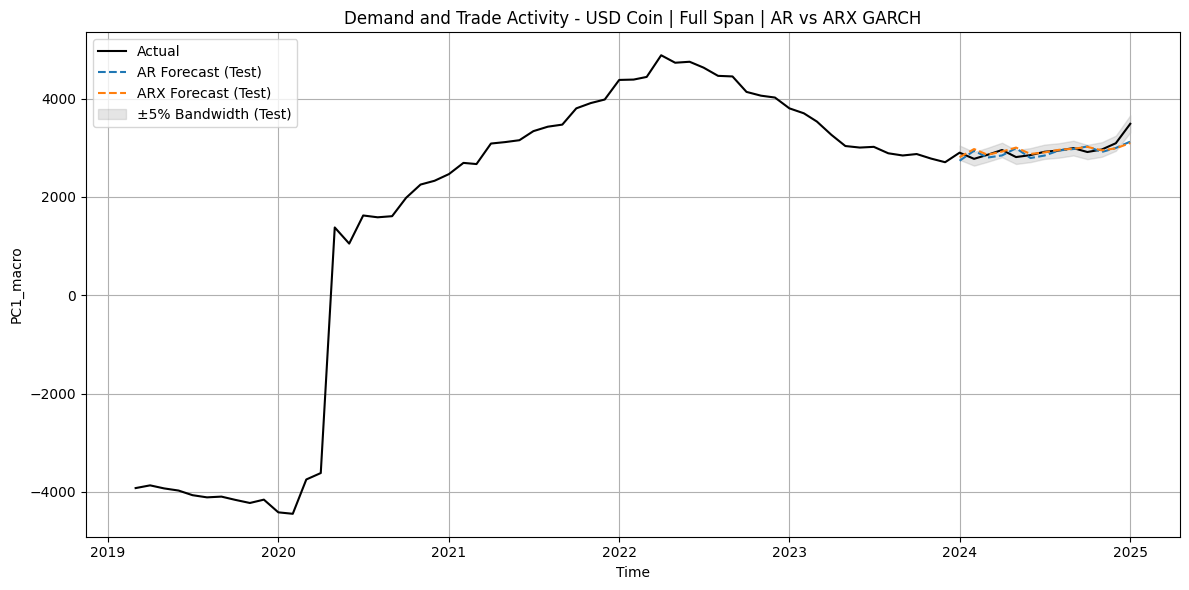

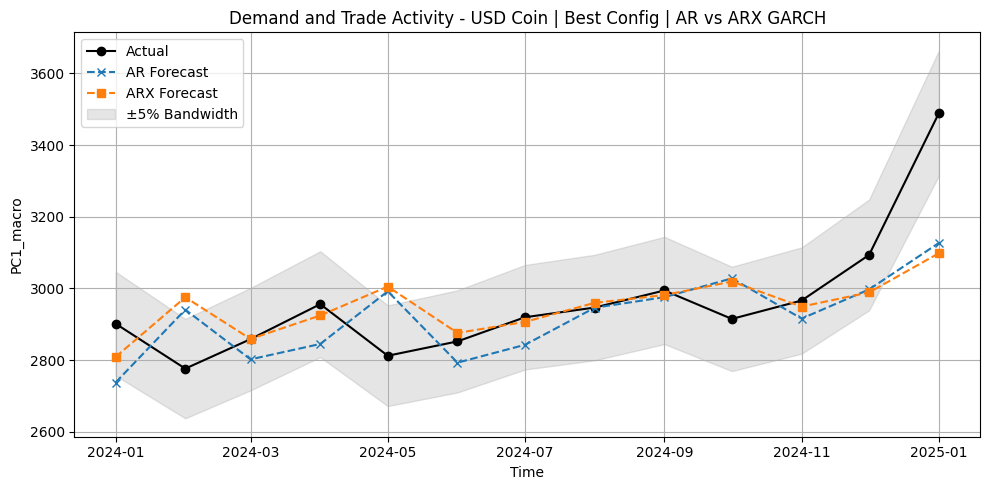

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=2, q=2, lag=0) for Demand and Trade Activity - Broad Crypto Market Movement | MAPE ↓ -9.39%


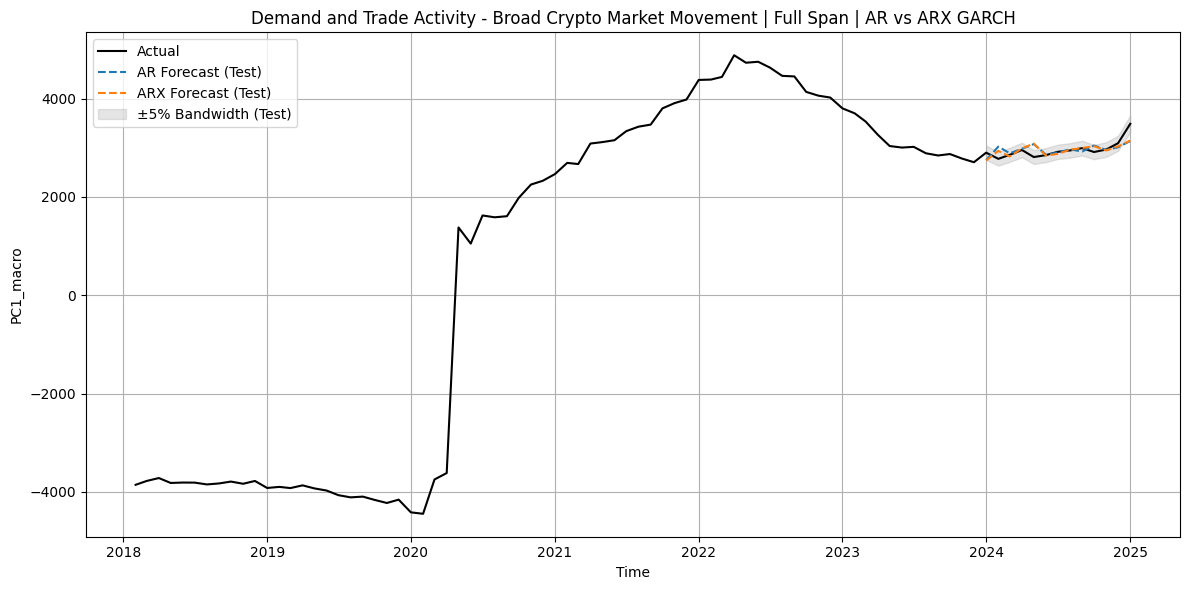

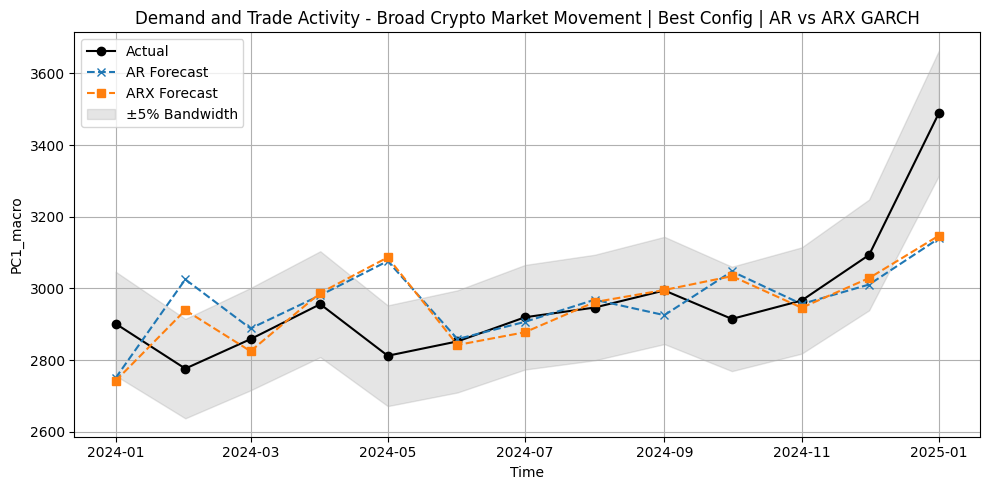

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=2, q=2, lag=6) for Demand and Trade Activity - Speculative Cryptocurrencies | MAPE ↓ -9.86%


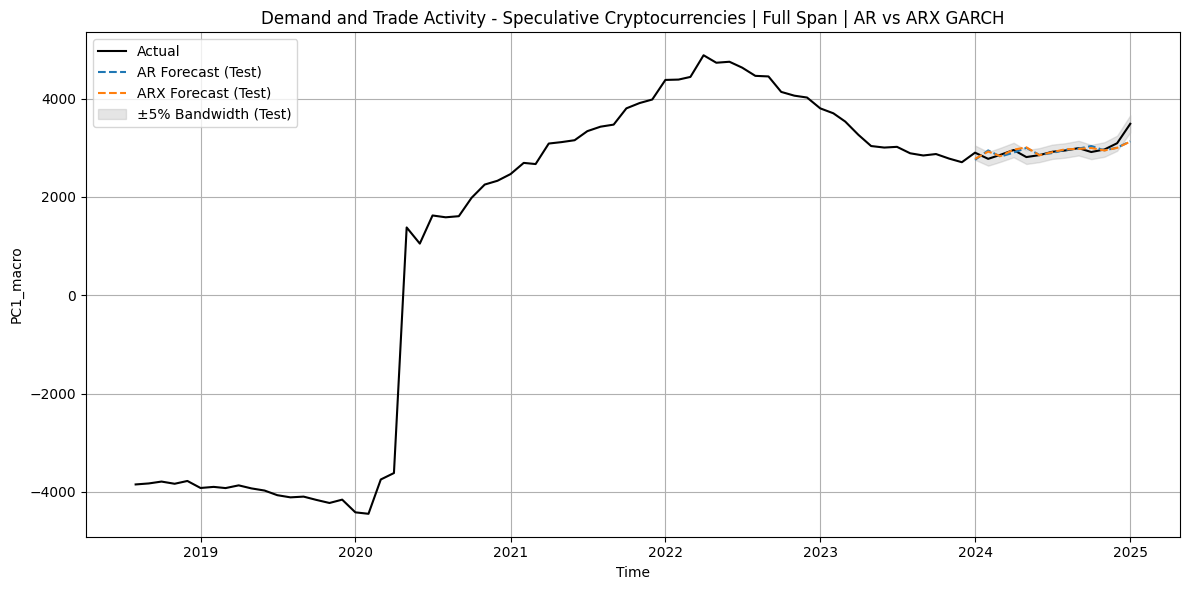

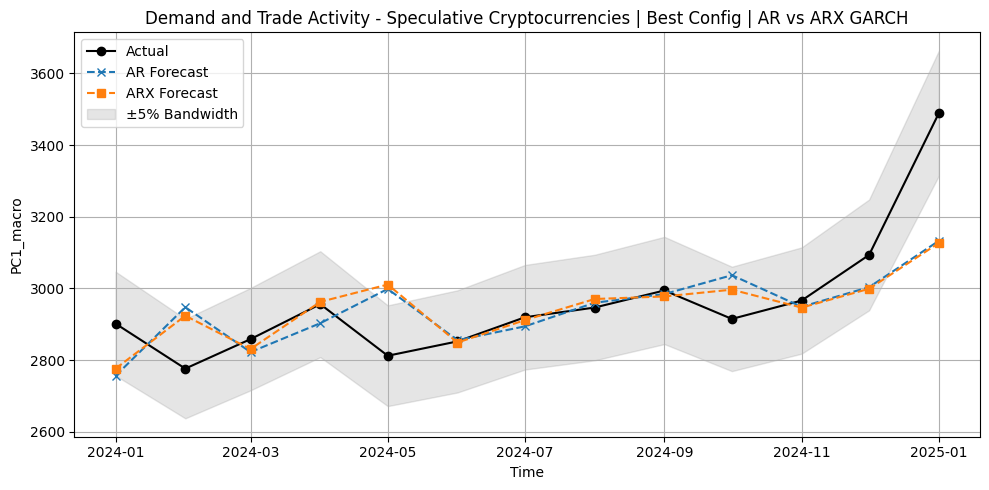

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSURE


✅ Best (p=1, q=0, lag=3) for Economic Confidence - Tether | MAPE ↓ -9.43%


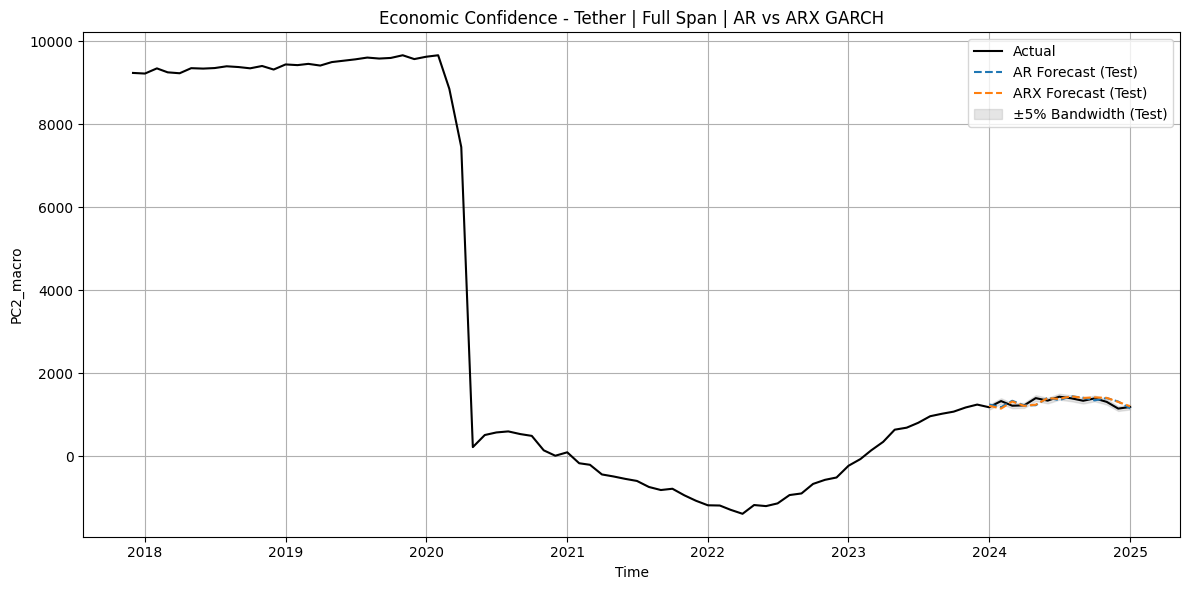

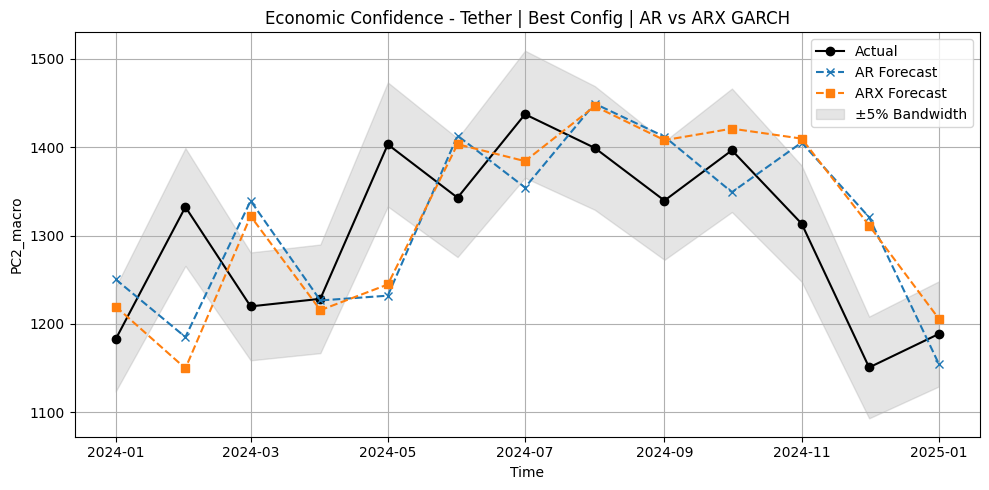


✅ Best (p=1, q=2, lag=5) for Economic Confidence - USD Coin | MAPE ↓ -72.91%


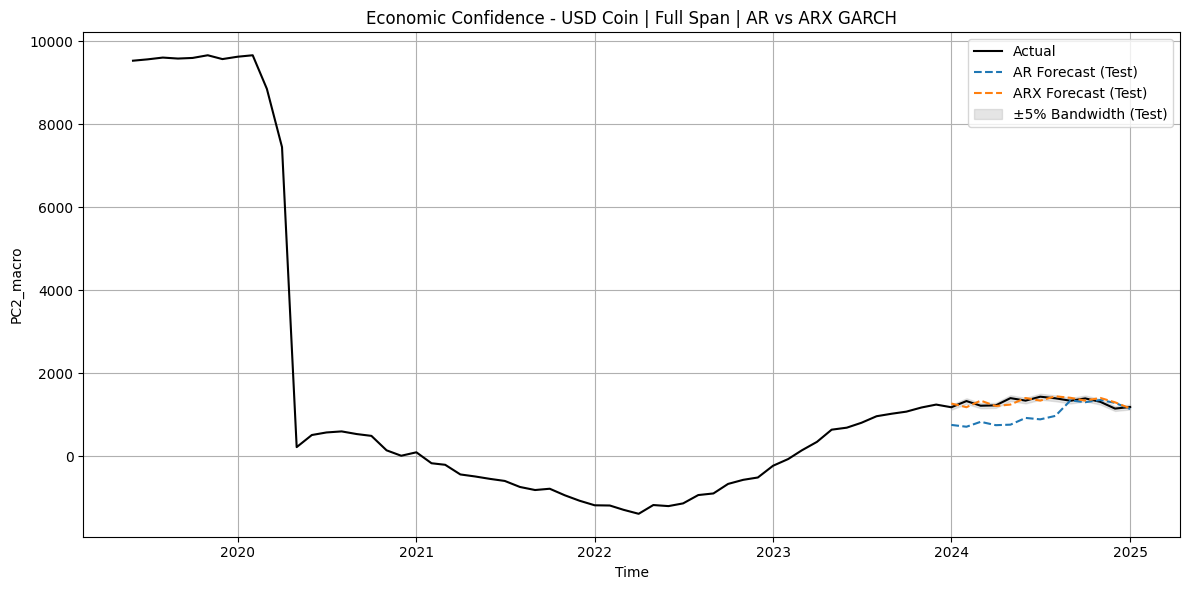

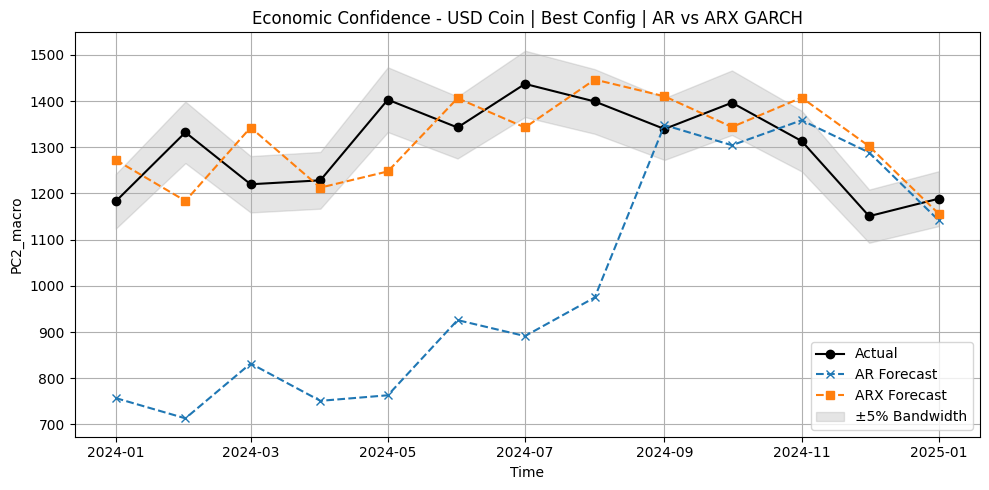

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=1, q=2, lag=5) for Economic Confidence - Broad Crypto Market Movement | MAPE ↓ -9.80%


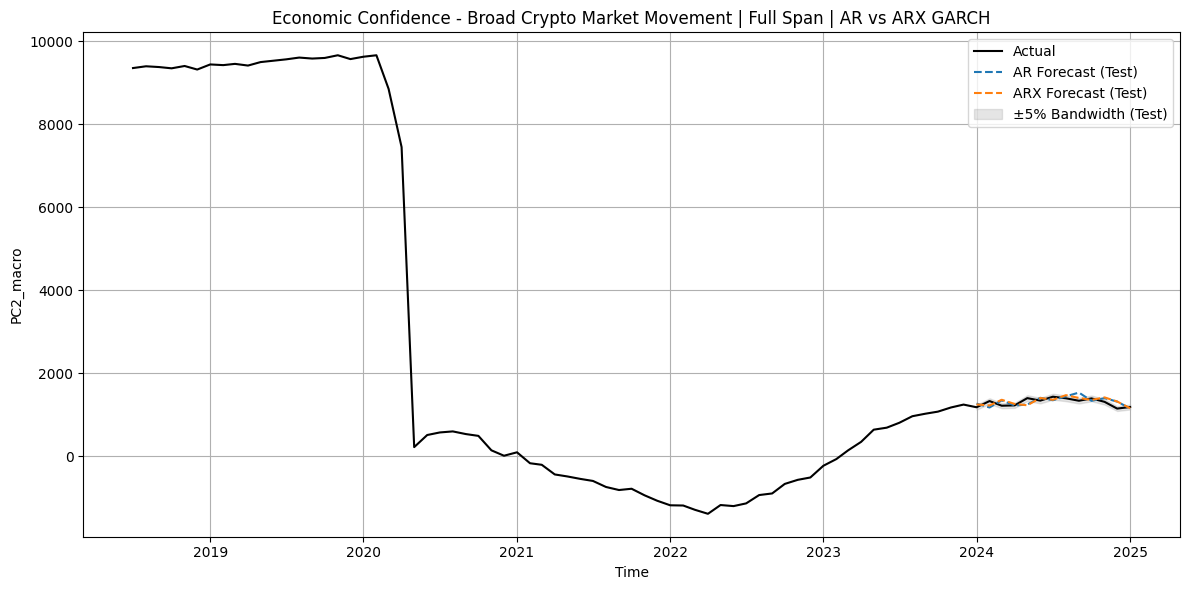

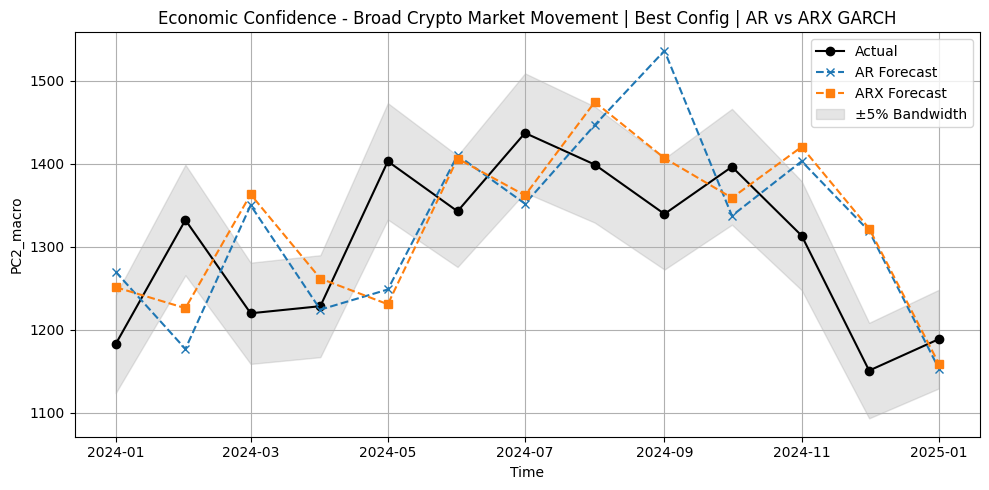

/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tianyishen/Desktop/CSUREMM project/CryptoMacroecon-Prediction-CSUREMM-1/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



✅ Best (p=1, q=2, lag=5) for Economic Confidence - Speculative Cryptocurrencies | MAPE ↓ -11.99%


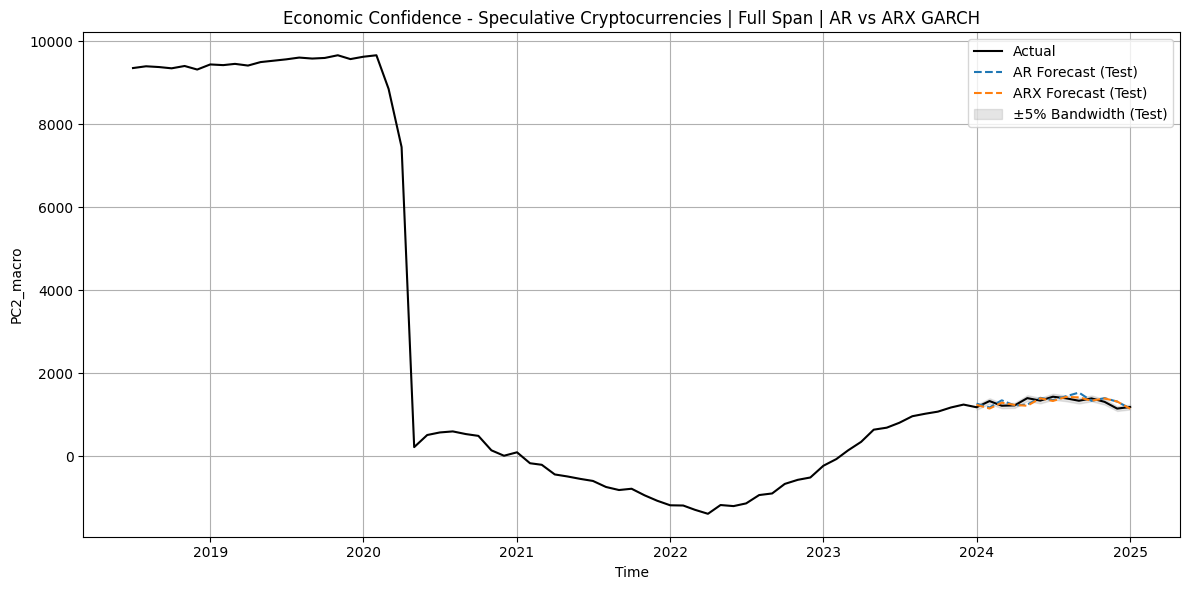

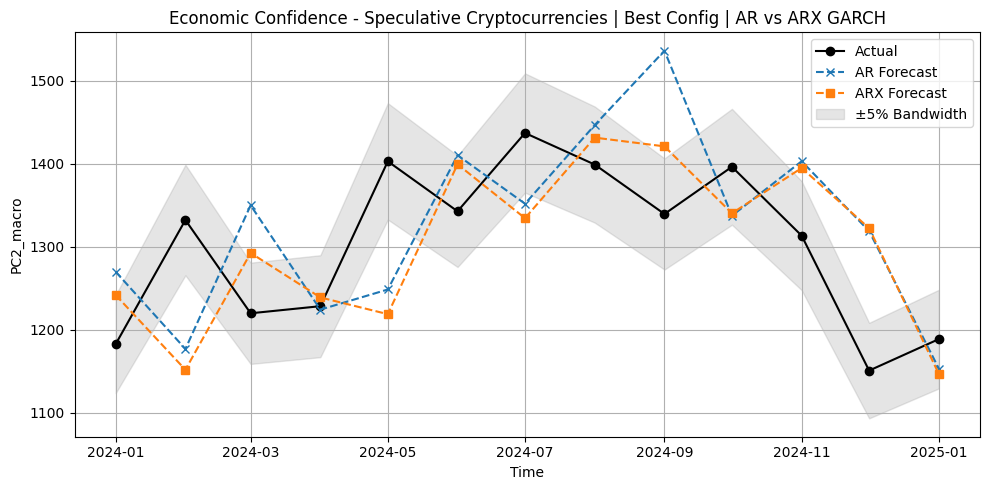

,Macro,Crypto,p,q,Exog Lag,MAPE_AR,MAPE_ARX,R2_AR,R2_ARX,MAPE_Improvement(%),Macro (Named),Crypto (Named)
5,PC2_macro,USD Coin,1,2,5,24.975439,6.766759,-17.023476,-0.109593,-72.906346,Economic Confidence,USD Coin
0,PC1_macro,Tether,2,2,1,3.995189,3.170216,0.109618,0.414285,-20.649162,Demand and Trade Activity,Tether
1,PC1_macro,USD Coin,2,0,2,3.705048,3.017748,0.302902,0.315978,-18.550374,Demand and Trade Activity,USD Coin
7,PC2_macro,PC2_crypto,1,2,5,7.595128,6.684596,-0.472926,-0.219775,-11.988365,Economic Confidence,Speculative Cryptocurrencies
3,PC1_macro,PC2_crypto,2,2,6,3.119726,2.812218,0.373152,0.411235,-9.856877,Demand and Trade Activity,Speculative Cryptocurrencies
6,PC2_macro,PC1_crypto,1,2,5,7.595128,6.851077,-0.472926,-0.152721,-9.796418,Economic Confidence,Broad Crypto Market Movement
4,PC2_macro,Tether,1,0,3,6.679812,6.049628,-0.149876,-0.058559,-9.434160,Economic Confidence,Tether
2,PC1_macro,PC1_crypto,2,2,0,3.598034,3.260340,0.196200,0.303621,-9.385534,Demand and Trade Activity,Broad Crypto Market Movement


In [12]:
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Mapping old PC names to descriptive names
pc_name_map = {
    'PC1_macro': 'Demand and Trade Activity',
    'PC2_macro': 'Economic Confidence',
    'PC1_crypto': 'Broad Crypto Market Movement',
    'PC2_crypto': 'Speculative Cryptocurrencies'
}

# Forecasting utility
def safe_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100 if np.any(mask) else np.nan

def rolling_forecast_ar(y_train_scaled, y_test_scaled, p, q, l):
    history = list(y_train_scaled)
    preds = []
    for t in range(len(y_test_scaled)):
        model = arch_model(history, mean='AR', lags=l, vol='GARCH', p=p, q=q, dist='normal', rescale=False)
        res = model.fit(disp='off')
        forecast = res.forecast(horizon=1, method='analytic')
        pred = forecast.mean.values[-1, 0]
        preds.append(pred)
        history.append(y_test_scaled[t])
    return np.array(preds)

def rolling_forecast_arx(y_train_scaled, x_train_scaled, y_test_scaled, x_test_scaled, p, q, l):
    history_y = list(y_train_scaled)
    history_x = list(x_train_scaled)
    preds = []
    for t in range(len(y_test_scaled)):
        x_arr = np.array(history_x)
        model = arch_model(history_y, mean='ARX', lags=l, vol='GARCH', p=p, q=q, x=x_arr, dist='normal', rescale=False)
        res = model.fit(disp='off')
        const = res.params.get('Const', 0)
        phi = res.params.get('y[1]', 0)
        beta = res.params.get('x0', 0)
        y_t = history_y[-1]
        x_t1 = x_test_scaled[t]
        pred = const + phi * y_t + beta * x_t1
        preds.append(pred)
        history_y.append(y_test_scaled[t])
        history_x.append(x_test_scaled[t])
    return np.array(preds)

# Pair definition
pair_orders = {
    ('PC1_macro', 'Tether'): {'lag': 0},
    ('PC1_macro', 'USD Coin'): {'lag': 4},
    ('PC1_macro', 'PC1_crypto'): {'lag': 1},
    ('PC1_macro', 'PC2_crypto'): {'lag': 1},
    ('PC2_macro', 'Tether'): {'lag': 0},
    ('PC2_macro', 'USD Coin'): {'lag': 2},
    ('PC2_macro', 'PC1_crypto'): {'lag': 0},
    ('PC2_macro', 'PC2_crypto'): {'lag': 0},
}

# Storage
all_results = []
best_results = []

# Grid search
for (macro, asset), _ in pair_orders.items():
    if f'{macro}_diff_diff' in df.columns:
        y_col = f'{macro}_diff_diff'
    elif f'{macro}_diff' in df.columns:
        y_col = f'{macro}_diff'
    else:
        y_col = macro

    if macro not in df.columns or asset not in df.columns:
        print(f"Skipping {macro}-{asset}: missing in DataFrame")
        continue

    best_result = None

    for p in range(1, 3):
        for q in range(0, 3):
            if p==0 and q==0:
                continue
            for lag in range(0, 7):
                df_temp = df[[y_col, asset]].copy()
                df_temp[asset] = df_temp[asset].shift(lag)
                df_temp.dropna(inplace=True)

                if len(df_temp) < 30 or df_temp[y_col].var() == 0 or df_temp[asset].var() == 0:
                    continue

                cutoff_date = pd.to_datetime('2024-01-01')
                df_train = df_temp[df_temp.index < cutoff_date]
                df_test = df_temp[df_temp.index >= cutoff_date]

                if len(df_test) == 0 or len(df_train) < 10:
                    continue

                scaler_y = StandardScaler()
                scaler_x = StandardScaler()
                y_train_scaled = scaler_y.fit_transform(df_train[[y_col]]).flatten()
                x_train_scaled = scaler_x.fit_transform(df_train[[asset]]).flatten()
                y_test_scaled = scaler_y.transform(df_test[[y_col]]).flatten()
                x_test_scaled = scaler_x.transform(df_test[[asset]]).flatten()

                try:
                    pred_ar_scaled = rolling_forecast_ar(y_train_scaled, y_test_scaled, p, q, 1)
                    pred_arx_scaled = rolling_forecast_arx(y_train_scaled, x_train_scaled, y_test_scaled, x_test_scaled, p, q, 1)

                    pred_ar = scaler_y.inverse_transform(pred_ar_scaled.reshape(-1, 1)).flatten()
                    pred_arx = scaler_y.inverse_transform(pred_arx_scaled.reshape(-1, 1)).flatten()
                    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
                    index_test = df_test.index

                    mse_ar = mean_squared_error(y_actual, pred_ar)
                    mse_arx = mean_squared_error(y_actual, pred_arx)
                    r2_ar = r2_score(y_actual, pred_ar)
                    r2_arx = r2_score(y_actual, pred_arx)
                    mape_ar = safe_mape(y_actual, pred_ar)
                    mape_arx = safe_mape(y_actual, pred_arx)
                    mape_change = ((mape_arx - mape_ar) / mape_ar) * 100 if mape_ar != 0 else np.nan

                    result_entry = {
                        'Macro': macro,
                        'Crypto': asset,
                        'p': p,
                        'q': q,
                        'Exog Lag': lag,
                        'MAPE_AR': mape_ar,
                        'MAPE_ARX': mape_arx,
                        'R2_AR': r2_ar,
                        'R2_ARX': r2_arx,
                        'MAPE_Improvement(%)': mape_change,
                    }

                    all_results.append(result_entry)

                    if best_result is None or (mape_change < best_result['MAPE_Improvement(%)']):
                        best_result = result_entry.copy()
                        best_result.update({
                            'index_test': index_test,
                            'y_actual': y_actual,
                            'pred_ar': pred_ar,
                            'pred_arx': pred_arx,
                            'y_col': y_col,
                            'full_index': df_temp.index,
                            'full_actual': df_temp[y_col].values
                        })

                except Exception as e:
                    print(f"⚠️ Forecast failed for {macro}-{asset} p={p}, q={q}, lag={lag}: {e}")

    if best_result:
        # Descriptive names for better presentation
        display_macro = pc_name_map.get(best_result['Macro'], best_result['Macro'])
        display_crypto = pc_name_map.get(best_result['Crypto'], best_result['Crypto'])

        best_results.append({
            **{k: v for k, v in best_result.items() if k not in ['index_test', 'y_actual', 'pred_ar', 'pred_arx', 'y_col', 'full_index', 'full_actual']},
            'Macro (Named)': display_macro,
            'Crypto (Named)': display_crypto
        })

        print(f"\n✅ Best (p={best_result['p']}, q={best_result['q']}, lag={best_result['Exog Lag']}) for {display_macro} - {display_crypto} | MAPE ↓ {best_result['MAPE_Improvement(%)']:.2f}%")

        # Full span forecast plot
        full_pred_ar = np.full(len(best_result['full_index']), np.nan)
        full_pred_arx = np.full(len(best_result['full_index']), np.nan)
        test_start_idx = best_result['full_index'].get_loc(best_result['index_test'][0])
        full_pred_ar[test_start_idx:test_start_idx + len(best_result['pred_ar'])] = best_result['pred_ar']
        full_pred_arx[test_start_idx:test_start_idx + len(best_result['pred_arx'])] = best_result['pred_arx']

        plt.figure(figsize=(12, 6))
        plt.plot(best_result['full_index'], best_result['full_actual'], label='Actual', color='black')
        plt.plot(best_result['full_index'], full_pred_ar, label='AR Forecast (Test)', linestyle='--')
        plt.plot(best_result['full_index'], full_pred_arx, label='ARX Forecast (Test)', linestyle='--')
        plt.fill_between(
            best_result['index_test'],
            best_result['y_actual'] * 0.95,
            best_result['y_actual'] * 1.05,
            color='gray', alpha=0.2, label='±5% Bandwidth (Test)'
        )
        plt.title(f"{display_macro} - {display_crypto} | Full Span | AR vs ARX GARCH")
        plt.xlabel("Time")
        plt.ylabel(best_result['y_col'])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Test period plot
        plt.figure(figsize=(10, 5))
        plt.plot(best_result['index_test'], best_result['y_actual'], label='Actual', color='black', marker='o')
        plt.plot(best_result['index_test'], best_result['pred_ar'], label='AR Forecast', linestyle='--', marker='x')
        plt.plot(best_result['index_test'], best_result['pred_arx'], label='ARX Forecast', linestyle='--', marker='s')
        plt.fill_between(best_result['index_test'], best_result['y_actual'] * 0.95, best_result['y_actual'] * 1.05, color='gray', alpha=0.2, label='±5% Bandwidth')
        plt.title(f"{display_macro} - {display_crypto} | Best Config | AR vs ARX GARCH")
        plt.xlabel("Time")
        plt.ylabel(best_result['y_col'])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Final results tables
all_results_df = pd.DataFrame(all_results)
best_results_df = pd.DataFrame(best_results)

# Display best configs sorted by improvement
display(best_results_df.sort_values('MAPE_Improvement(%)'))
